In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

# ----------------------- LOAD DATASET -----------------------
url = "C:\\Users\\Diptyajit Sinha\\Downloads\\KAE education\\Self Projects\\earthquakes.csv"

df = pd.read_csv(url)


# ----------------------- BASIC INFO -----------------------
print(df.info())
print(df.describe())
print("Total records:", df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23412 non-null  object 
 1   Latitude   23412 non-null  float64
 2   Longitude  23412 non-null  float64
 3   Magnitude  23412 non-null  float64
dtypes: float64(3), object(1)
memory usage: 731.8+ KB
None
           Latitude     Longitude     Magnitude
count  23412.000000  23412.000000  23412.000000
mean       1.679033     39.639961      5.882531
std       30.113183    125.511959      0.423066
min      -77.080000   -179.997000      5.500000
25%      -18.653000    -76.349750      5.600000
50%       -3.568500    103.982000      5.700000
75%       26.190750    145.026250      6.000000
max       86.005000    179.998000      9.100000
Total records: 23412


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df['decade'] = (df['year'] // 10) * 10  # group by decades


In [7]:
df

Date  Latitude  Longitude  Magnitude
0      01/02/1965   19.2460   145.6160        6.0
1      01/04/1965    1.8630   127.3520        5.8
2      01/05/1965  -20.5790  -173.9720        6.2
3      01/08/1965  -59.0760   -23.5570        5.8
4      01/09/1965   11.9380   126.4270        5.8
...           ...       ...        ...        ...
23407  12/28/2016   38.3917  -118.8941        5.6
23408  12/28/2016   38.3777  -118.8957        5.5
23409  12/28/2016   36.9179   140.4262        5.9
23410  12/29/2016   -9.0283   118.6639        6.3
23411  12/30/2016   37.3973   141.4103        5.5

[23412 rows x 4 columns]

### 1. Earthquakes per year

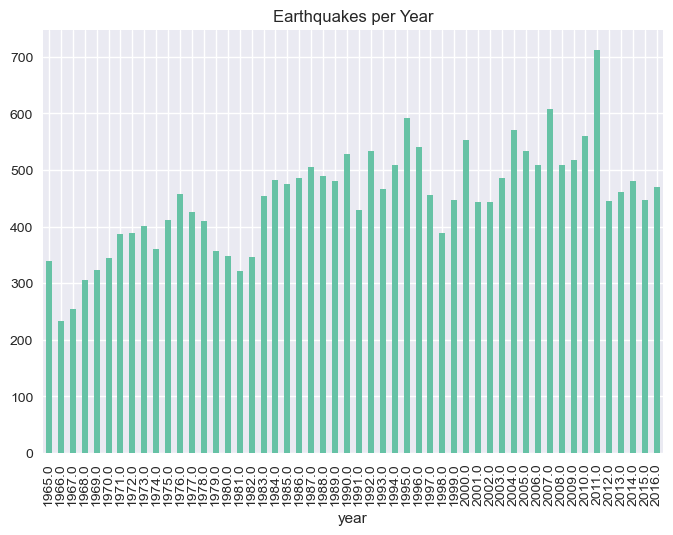

In [9]:
plt.figure()
df['year'].value_counts().sort_index().plot(kind="bar")
plt.title("Earthquakes per Year")
plt.show()

## Conclusion: Shows how earthquake frequency changes yearly.

### 2. Earthquakes per month

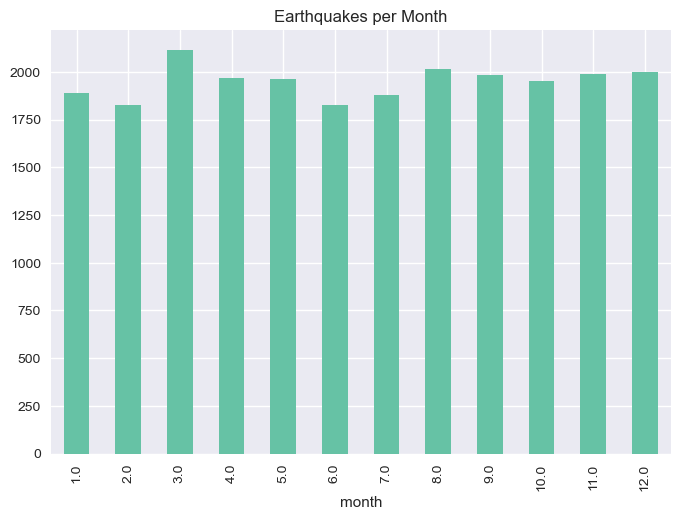

In [10]:
plt.figure()
df['month'].value_counts().sort_index().plot(kind="bar")
plt.title("Earthquakes per Month")
plt.show()

## Conclusion: Helps identify seasonal earthquake activity trends.

### 3. Earthquakes per day

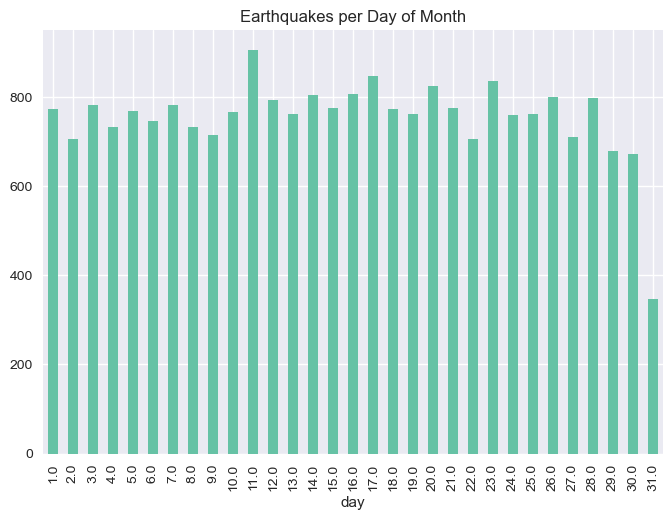

In [11]:
plt.figure()
df['day'].value_counts().sort_index().plot(kind="bar")
plt.title("Earthquakes per Day of Month")
plt.show()

### Conclusion: No strong pattern expected, but useful for distribution check.

### 4. Earthquakes by hour

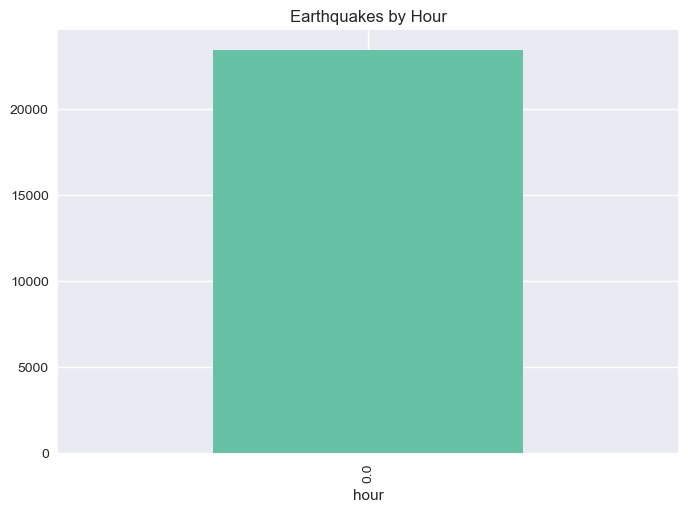

In [12]:
plt.figure()
df['hour'].value_counts().sort_index().plot(kind="bar")
plt.title("Earthquakes by Hour")
plt.show()

## Conclusion: Helps see if quakes show hourly distribution (though natural quakes should be random).

### 5. Earthquakes by decade

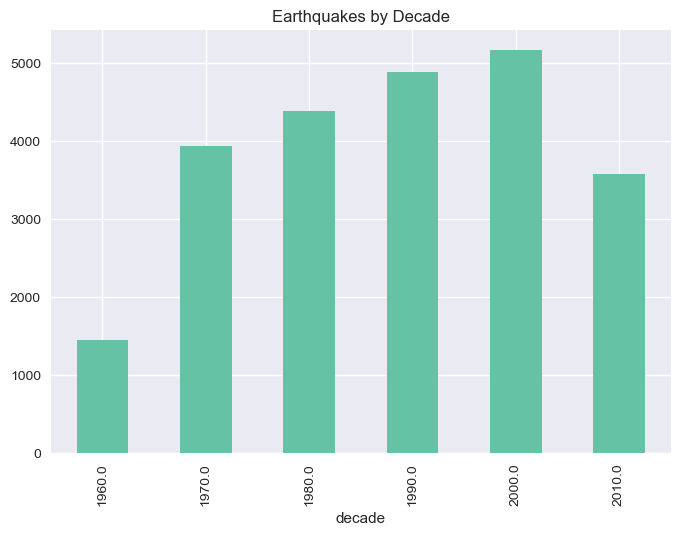

In [13]:
plt.figure()
df['decade'].value_counts().sort_index().plot(kind="bar")
plt.title("Earthquakes by Decade")
plt.show()
# Conclusion: Long-term trend in earthquake occurrences.

### 6. Distribution of magnitudes

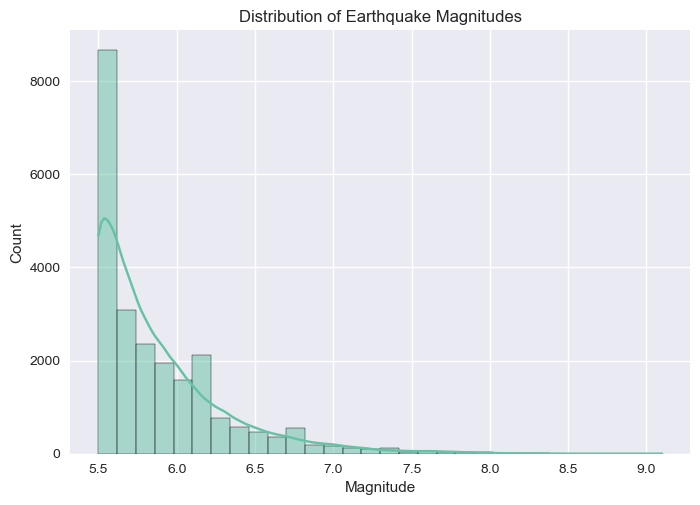

In [14]:
plt.figure()
sns.histplot(df['Magnitude'], bins=30, kde=True)
plt.title("Distribution of Earthquake Magnitudes")
plt.show()
# Conclusion: Most earthquakes are low magnitude; very strong ones are rare.


### 7. Strongest earthquakes (Top 10)

<Figure size 800x550 with 0 Axes>

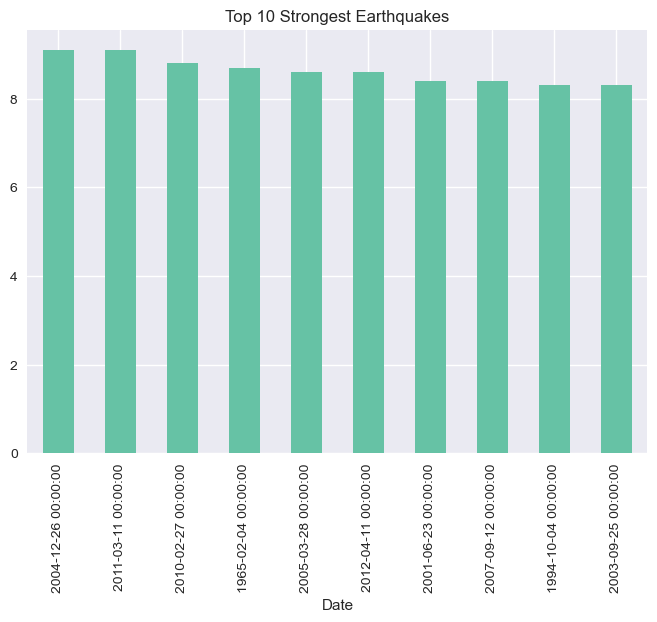

In [15]:
plt.figure()
df.nlargest(10, 'Magnitude')[['Date','Magnitude']].set_index('Date').plot(kind="bar", legend=False)
plt.title("Top 10 Strongest Earthquakes")
plt.show()
# Conclusion: Shows the most intense quakes in the dataset.


### 8. Average magnitude per year

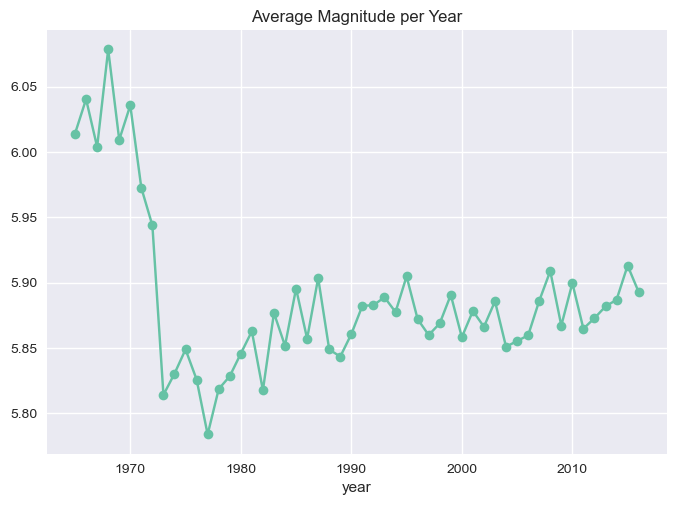

In [16]:
plt.figure()
df.groupby('year')['Magnitude'].mean().plot(kind="line", marker='o')
plt.title("Average Magnitude per Year")
plt.show()
# Conclusion: Identifies years with unusually high or low average magnitude.


### 9. Average magnitude per month

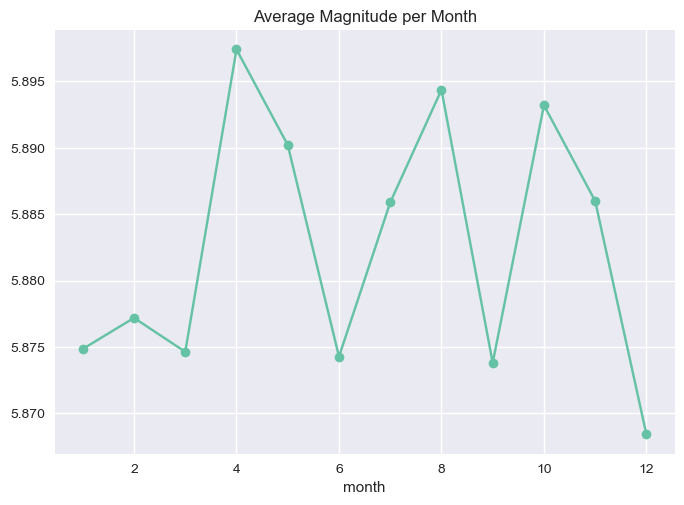

In [17]:
plt.figure()
df.groupby('month')['Magnitude'].mean().plot(kind="line", marker='o')
plt.title("Average Magnitude per Month")
plt.show()
# Conclusion: Seasonal variation in quake strength, if any.

### 10. Scatterplot: Latitude vs Longitude (epicenter map)

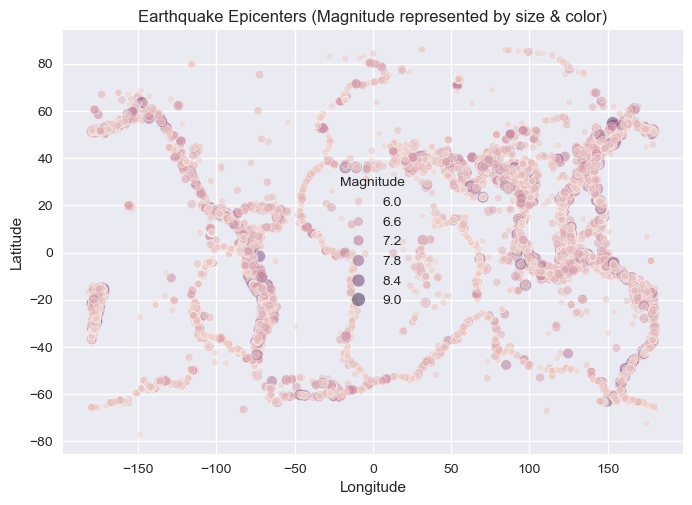

In [18]:
plt.figure()
sns.scatterplot(x='Longitude', y='Latitude', hue='Magnitude', size='Magnitude', data=df, alpha=0.5)
plt.title("Earthquake Epicenters (Magnitude represented by size & color)")
plt.show()
# Conclusion: Shows global distribution of epicenters.

### 11. Magnitude vs Latitude

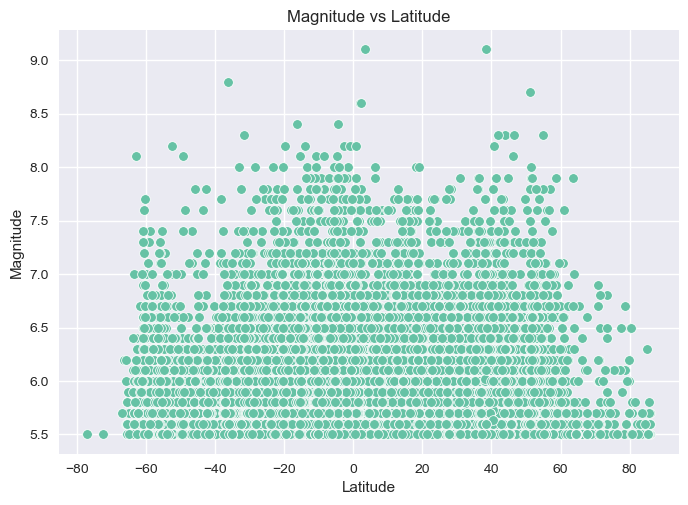

In [19]:
plt.figure()
sns.scatterplot(x='Latitude', y='Magnitude', data=df)
plt.title("Magnitude vs Latitude")
plt.show()
# Conclusion: Helps check if strong quakes cluster at specific latitudes.


### 12. Magnitude vs Longitude

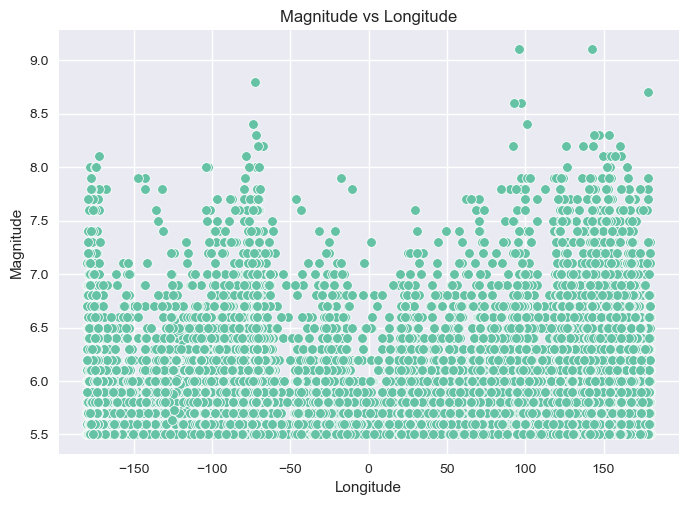

In [20]:
plt.figure()
sns.scatterplot(x='Longitude', y='Magnitude', data=df)
plt.title("Magnitude vs Longitude")
plt.show()
# Conclusion: Helps check longitude clustering of strong quakes.

### 13. Heatmap of quake density

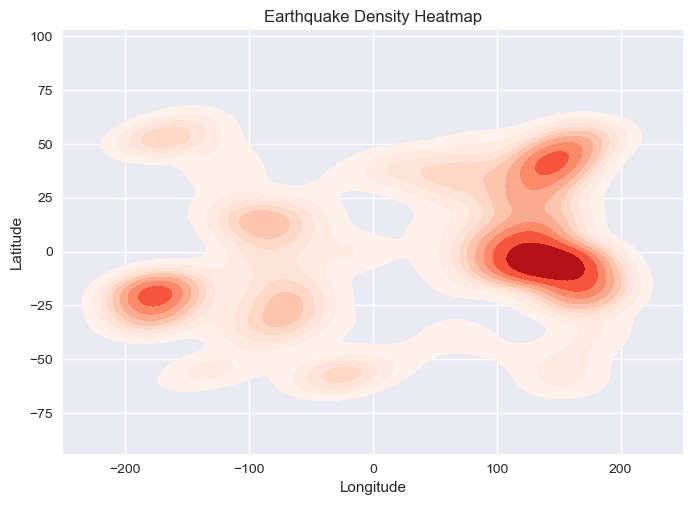

In [21]:
plt.figure()
sns.kdeplot(x=df['Longitude'], y=df['Latitude'], cmap="Reds", fill=True, thresh=0.05)
plt.title("Earthquake Density Heatmap")
plt.show()
# Conclusion: Shows hotspots of earthquake activity.

### 14. Earthquakes per hemisphere (North vs South)

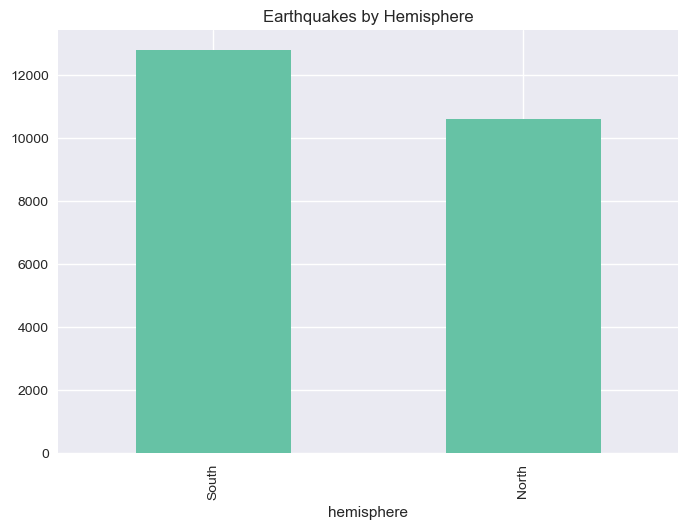

In [22]:
df['hemisphere'] = df['Latitude'].apply(lambda x: "North" if x >= 0 else "South")
plt.figure()
df['hemisphere'].value_counts().plot(kind="bar")
plt.title("Earthquakes by Hemisphere")
plt.show()
# Conclusion: Compares earthquake counts in Northern vs Southern Hemisphere.

### 15. Earthquakes per longitude hemisphere (East vs West)

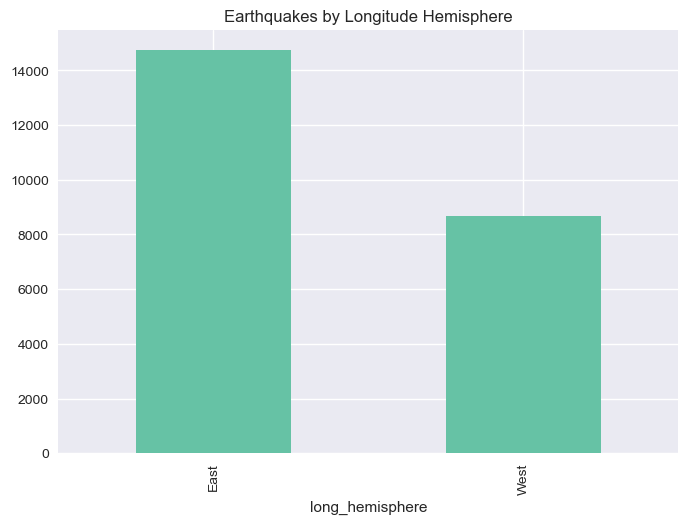

In [23]:
df['long_hemisphere'] = df['Longitude'].apply(lambda x: "East" if x >= 0 else "West")
plt.figure()
df['long_hemisphere'].value_counts().plot(kind="bar")
plt.title("Earthquakes by Longitude Hemisphere")
plt.show()
# Conclusion: Compares earthquakes in Eastern vs Western Hemisphere.

### 16. Magnitude categories

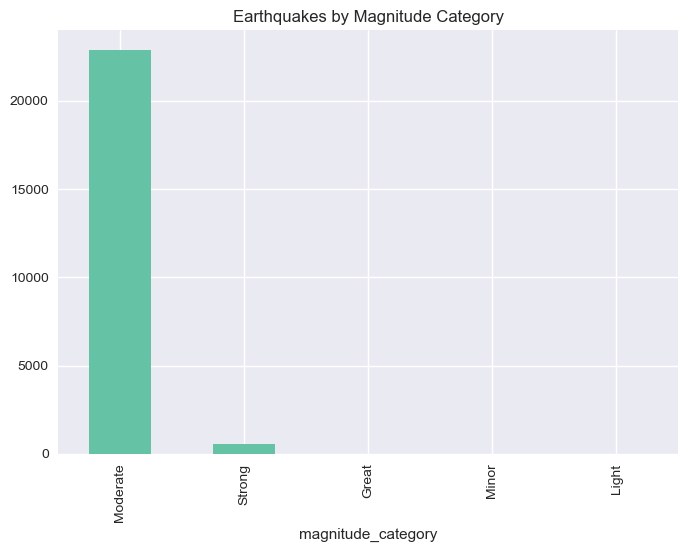

In [24]:
df['magnitude_category'] = pd.cut(df['Magnitude'],
                                  bins=[0,3,5,7,9,12],
                                  labels=['Minor','Light','Moderate','Strong','Great'])
plt.figure()
df['magnitude_category'].value_counts().plot(kind="bar")
plt.title("Earthquakes by Magnitude Category")
plt.show()
# Conclusion: Most earthquakes fall into lower magnitude categories.

### 17. Average magnitude per decade

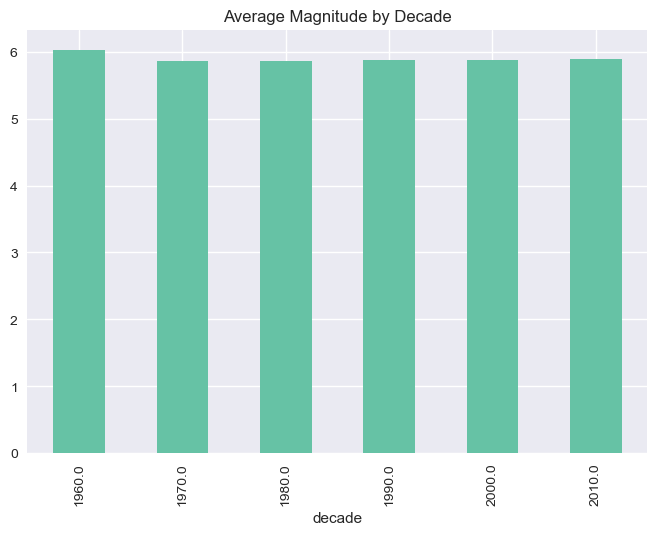

In [25]:
plt.figure()
df.groupby('decade')['Magnitude'].mean().plot(kind="bar")
plt.title("Average Magnitude by Decade")
plt.show()
# Conclusion: Detects if stronger quakes are becoming more/less common.

### 18. Strongest earthquake per year

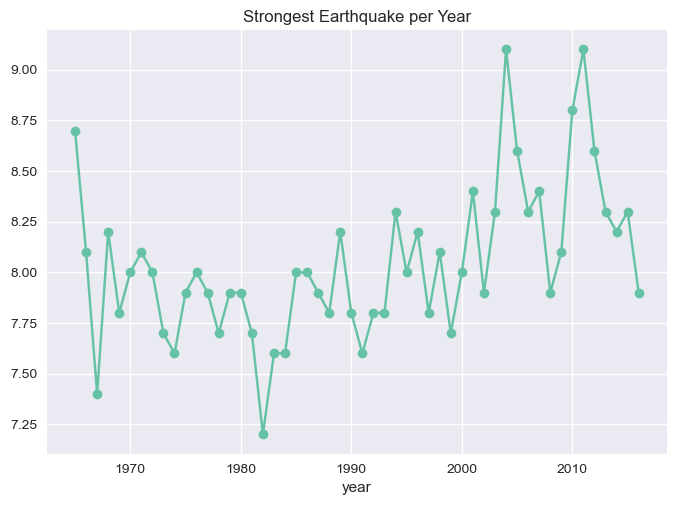

In [26]:
plt.figure()
df.groupby('year')['Magnitude'].max().plot(kind="line", marker='o')
plt.title("Strongest Earthquake per Year")
plt.show()
# Conclusion: Shows peak annual earthquake magnitude.


### 19. Correlation heatmap

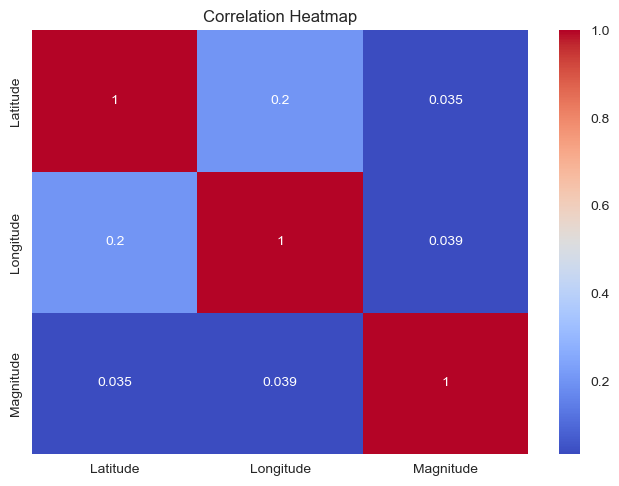

In [27]:
plt.figure()
sns.heatmap(df[['Latitude','Longitude','Magnitude']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
# Conclusion: Checks relationships among coordinates & magnitude.


### 20. Cumulative earthquakes over years

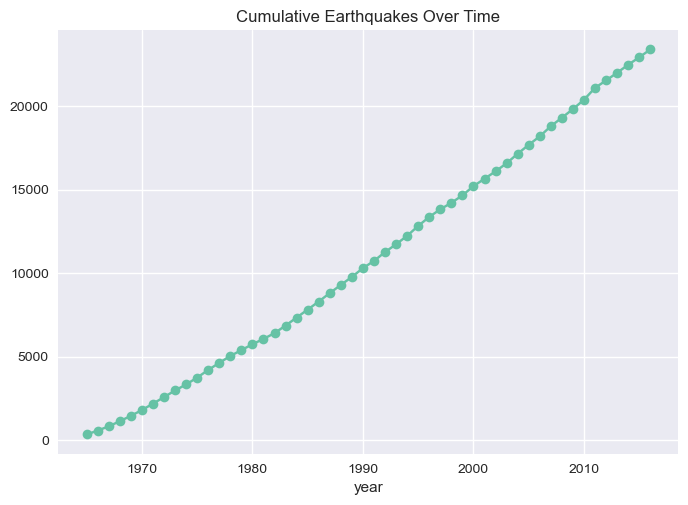

In [28]:
plt.figure()
df.groupby('year')['Magnitude'].count().cumsum().plot(kind="line", marker='o')
plt.title("Cumulative Earthquakes Over Time")
plt.show()
# Conclusion: Tracks growth of recorded earthquakes in dataset.

### 21. Median magnitude per year

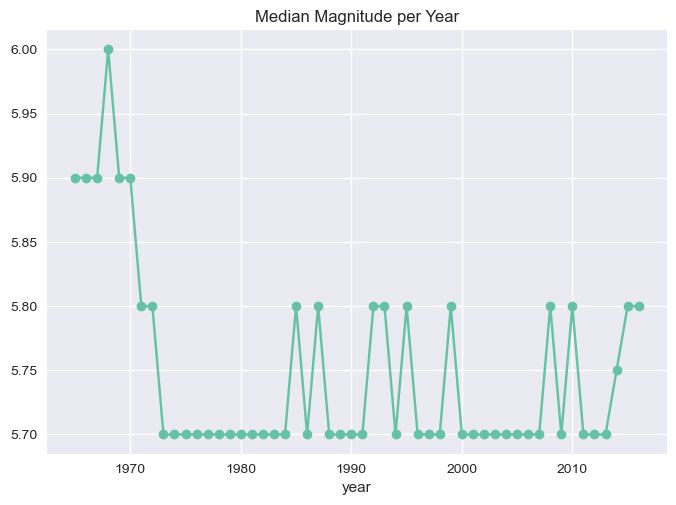

In [29]:
plt.figure()
df.groupby('year')['Magnitude'].median().plot(kind='line', marker='o')
plt.title("Median Magnitude per Year")
plt.show()
# Conclusion: Median magnitude is less sensitive to extreme outliers compared to mean.

### 22. Earthquake count trend (rolling average)

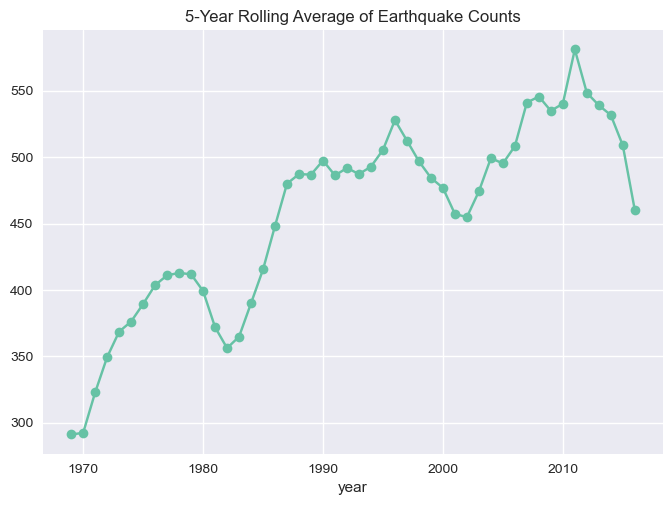

In [30]:
plt.figure()
df.groupby('year')['Magnitude'].count().rolling(5).mean().plot(kind='line', marker='o')
plt.title("5-Year Rolling Average of Earthquake Counts")
plt.show()
# Conclusion: Smooths short-term fluctuations to highlight long-term trends.

### 23. Earthquake magnitude boxplot by decade

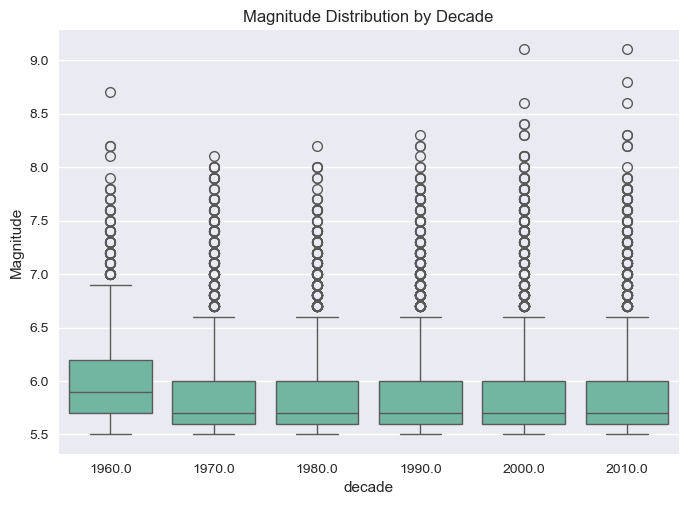

In [31]:
plt.figure()
sns.boxplot(x='decade', y='Magnitude', data=df)
plt.title("Magnitude Distribution by Decade")
plt.show()
# Conclusion: Shows spread and outliers of magnitudes over decades.


### 24. Yearly earthquake count vs. average magnitude

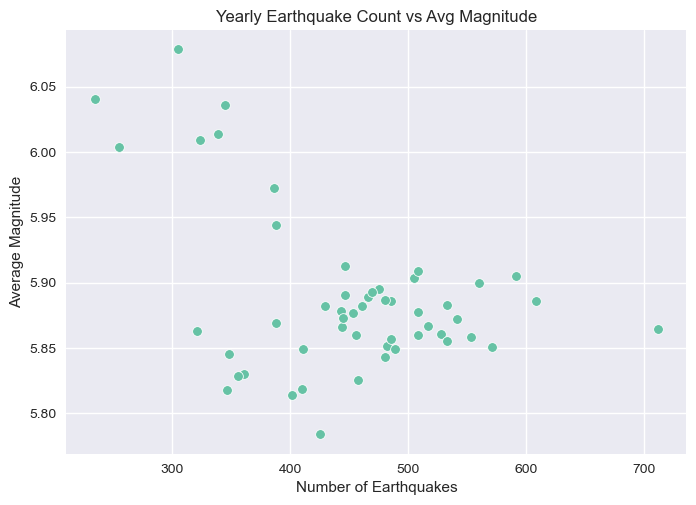

In [32]:
plt.figure()
sns.scatterplot(x=df.groupby('year')['Magnitude'].count(),
                y=df.groupby('year')['Magnitude'].mean())
plt.title("Yearly Earthquake Count vs Avg Magnitude")
plt.xlabel("Number of Earthquakes")
plt.ylabel("Average Magnitude")
plt.show()
# Conclusion: Checks if years with more quakes also had stronger ones.

### 25. Monthly earthquake heatmap

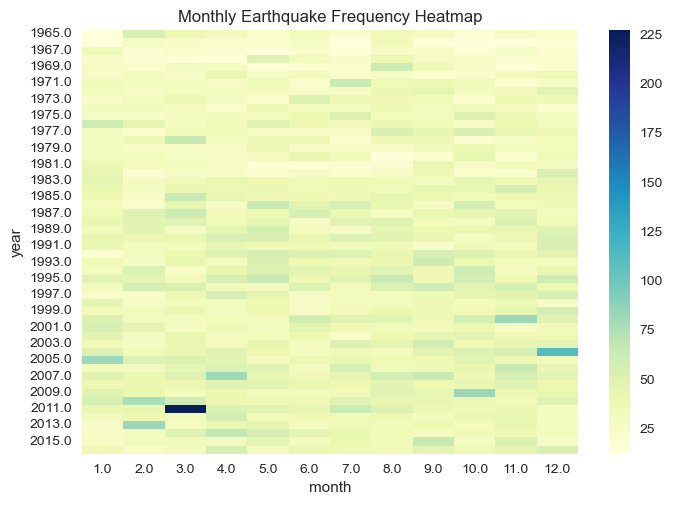

In [33]:
plt.figure()
monthly_counts = df.groupby(['year','month']).size().unstack(fill_value=0)
sns.heatmap(monthly_counts, cmap="YlGnBu")
plt.title("Monthly Earthquake Frequency Heatmap")
plt.show()
# Conclusion: Reveals seasonal/temporal clustering across years.

### 26. Earthquake counts by day of week

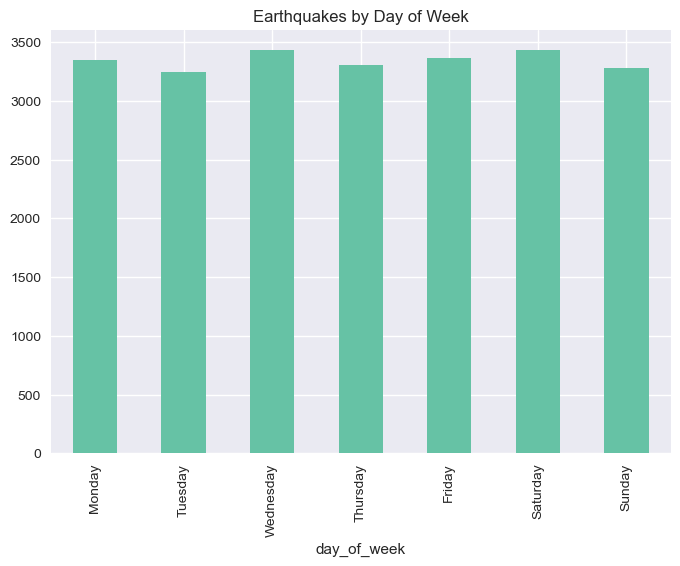

In [34]:
df['day_of_week'] = df['Date'].dt.day_name()
plt.figure()
df['day_of_week'].value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar')
plt.title("Earthquakes by Day of Week")
plt.show()
# Conclusion: Earthquakes are natural, so no bias expected—this validates randomness.

### 27. Average magnitude by day of week

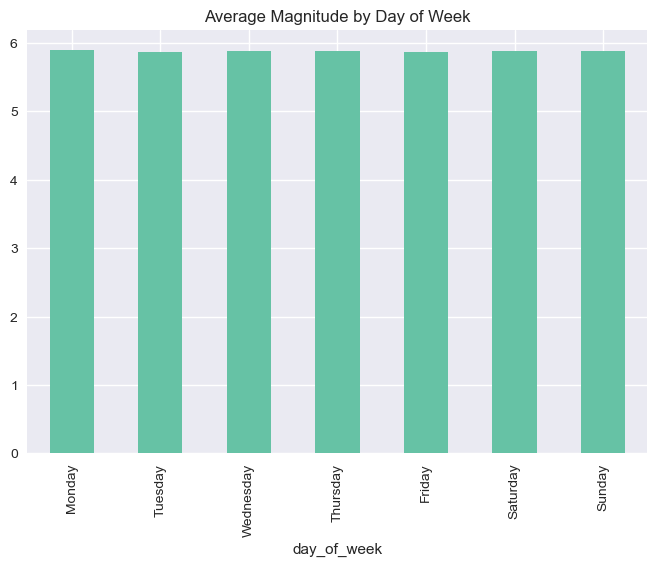

In [35]:
plt.figure()
df.groupby('day_of_week')['Magnitude'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar')
plt.title("Average Magnitude by Day of Week")
plt.show()
# Conclusion: Another randomness validation—no weekday effect.


### 28. Earthquake magnitude vs. hour of day

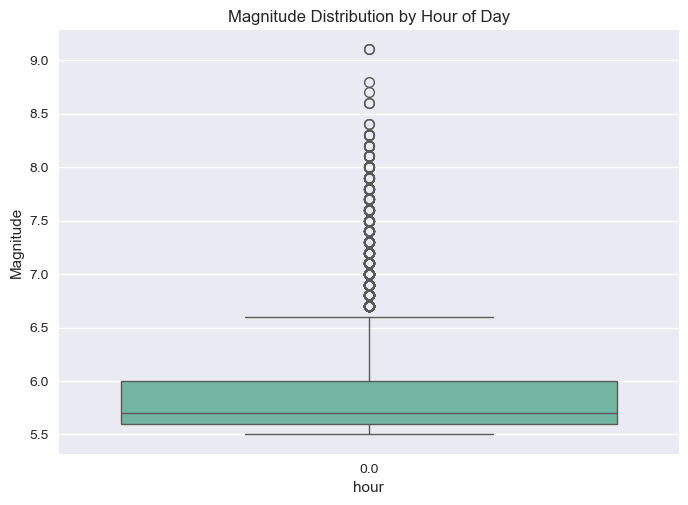

In [37]:
plt.figure()
sns.boxplot(x='hour', y='Magnitude', data=df)
plt.title("Magnitude Distribution by Hour of Day")
plt.show()
# Conclusion: Validates randomness of quake times across hours.


### 29. Frequency of "Great" earthquakes (≥8.0) per decade

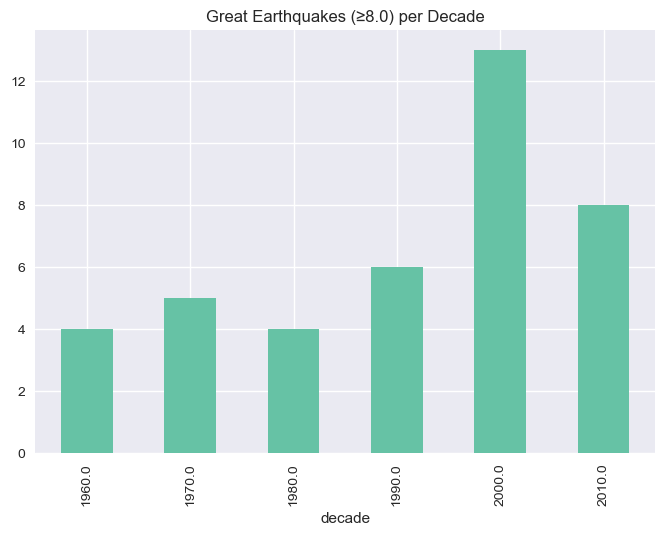

In [38]:
plt.figure()
df[df['Magnitude']>=8].groupby('decade')['Magnitude'].count().plot(kind='bar')
plt.title("Great Earthquakes (≥8.0) per Decade")
plt.show()
# Conclusion: Tracks how rare catastrophic earthquakes occur historically.

### 30. Proportion of strong earthquakes (≥7.0) by decade

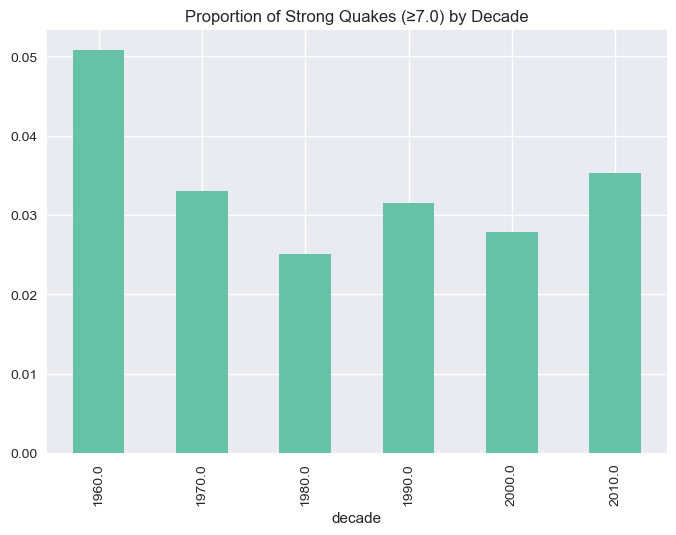

In [39]:
plt.figure()
(df[df['Magnitude']>=7].groupby('decade')['Magnitude'].count() /
 df.groupby('decade')['Magnitude'].count()).plot(kind='bar')
plt.title("Proportion of Strong Quakes (≥7.0) by Decade")
plt.show()
# Conclusion: Shows if stronger quakes are becoming more/less frequent.

### 31. Global earthquake density (Latitude vs Longitude bins)

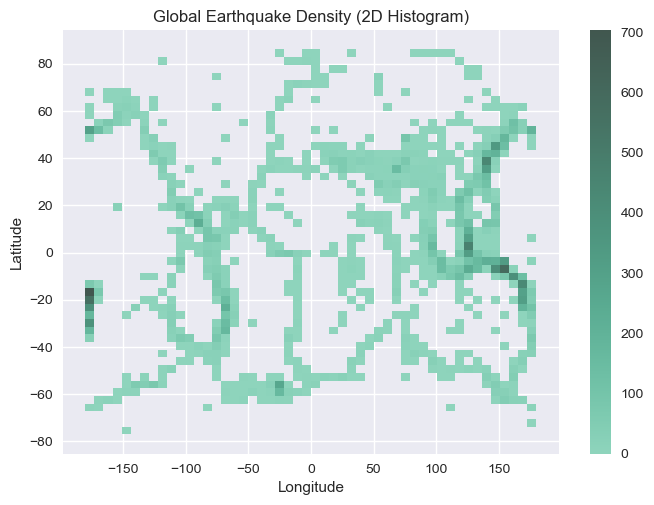

In [40]:
plt.figure()
sns.histplot2d = sns.histplot(data=df, x='Longitude', y='Latitude', bins=50, cbar=True)
plt.title("Global Earthquake Density (2D Histogram)")
plt.show()
# Conclusion: Alternative to KDE—shows density with discrete bins.

### 32. Earthquakes near equator vs. far from equator

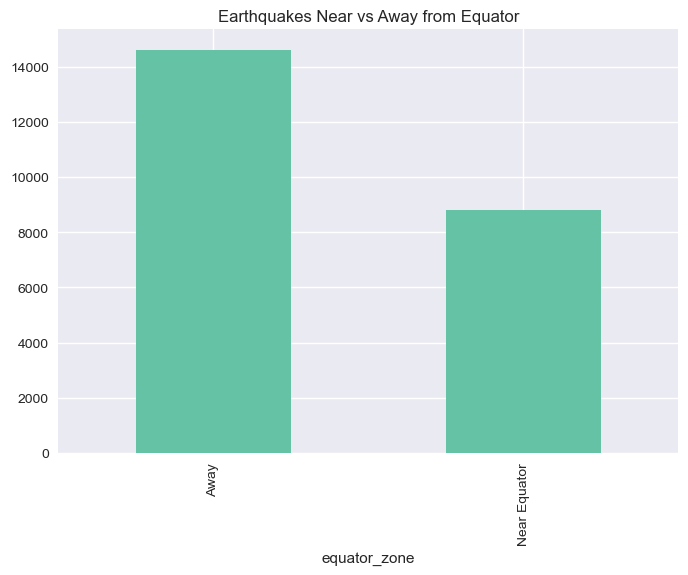

In [41]:
df['equator_zone'] = df['Latitude'].apply(lambda x: "Near Equator" if abs(x) < 15 else "Away")
plt.figure()
df['equator_zone'].value_counts().plot(kind='bar')
plt.title("Earthquakes Near vs Away from Equator")
plt.show()
# Conclusion: Plate tectonics often cluster near equatorial regions.

### 33. Average magnitude near vs away from equator

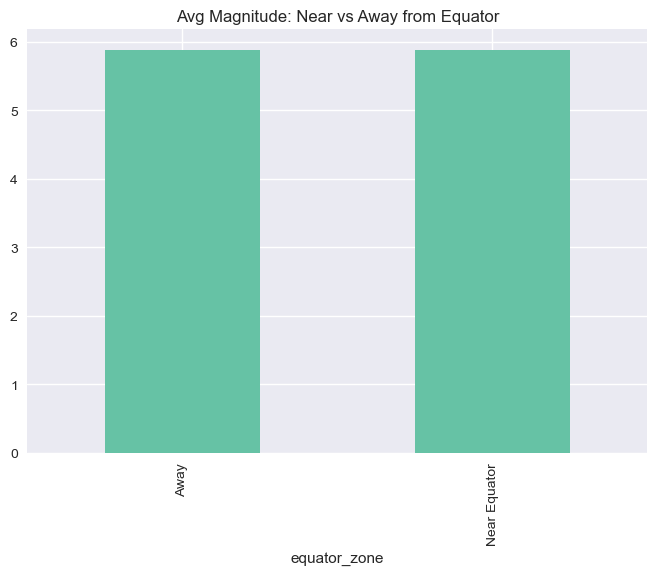

In [42]:
plt.figure()
df.groupby('equator_zone')['Magnitude'].mean().plot(kind='bar')
plt.title("Avg Magnitude: Near vs Away from Equator")
plt.show()
# Conclusion: Compares strength of equatorial vs non-equatorial quakes.


### 34. Earthquakes near prime meridian vs away

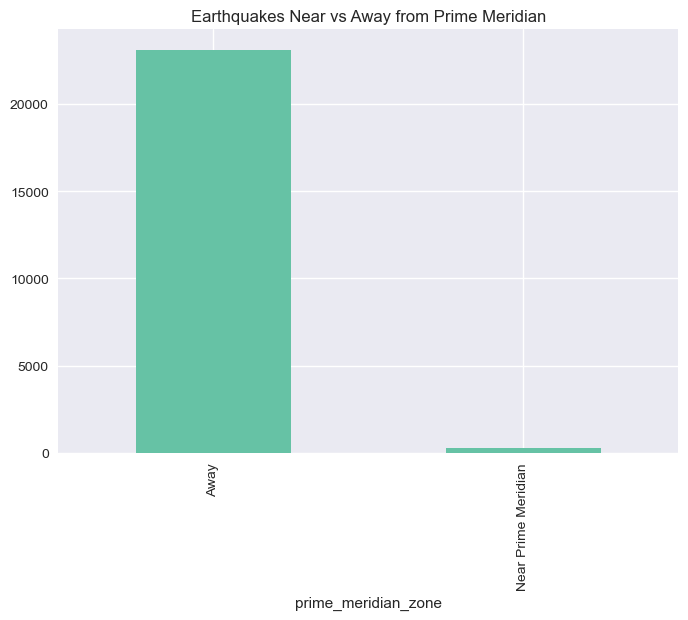

In [43]:
df['prime_meridian_zone'] = df['Longitude'].apply(lambda x: "Near Prime Meridian" if abs(x) < 15 else "Away")
plt.figure()
df['prime_meridian_zone'].value_counts().plot(kind='bar')
plt.title("Earthquakes Near vs Away from Prime Meridian")
plt.show()
# Conclusion: Quick comparison based on longitude clustering.

### 35. Strongest earthquake per month (all years)

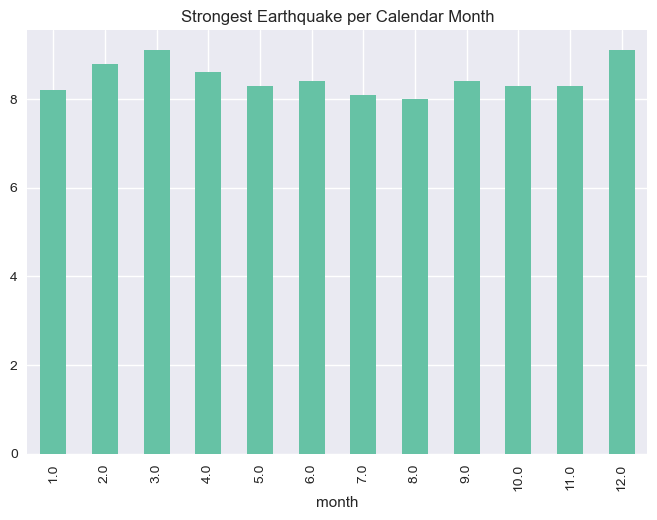

In [44]:
plt.figure()
df.groupby('month')['Magnitude'].max().plot(kind='bar')
plt.title("Strongest Earthquake per Calendar Month")
plt.show()
# Conclusion: Identifies months with record-breaking quakes.

### 36. Magnitude trend by latitude bands

C:\Users\Diptyajit Sinha\AppData\Local\Temp\ipykernel_10004\1661492719.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('lat_band')['Magnitude'].mean().plot(kind='bar')


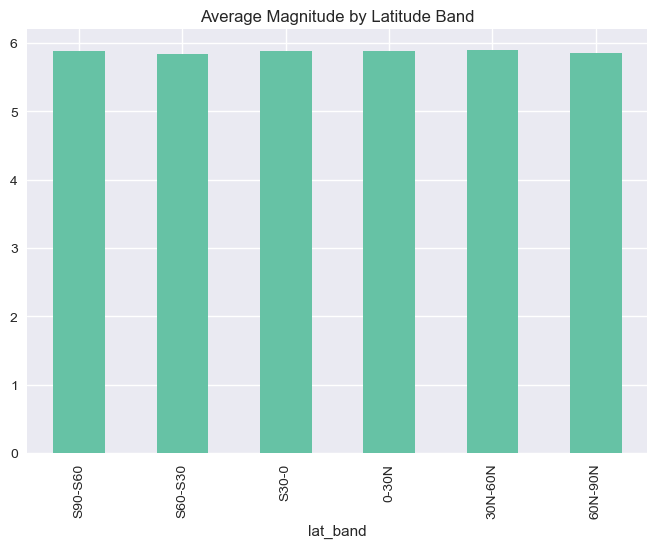

In [45]:
df['lat_band'] = pd.cut(df['Latitude'], bins=[-90,-60,-30,0,30,60,90],
                        labels=['S90-S60','S60-S30','S30-0','0-30N','30N-60N','60N-90N'])
plt.figure()
df.groupby('lat_band')['Magnitude'].mean().plot(kind='bar')
plt.title("Average Magnitude by Latitude Band")
plt.show()
# Conclusion: Compares earthquake strength across latitude zones.


### 37. Magnitude trend by longitude bands

C:\Users\Diptyajit Sinha\AppData\Local\Temp\ipykernel_10004\3620760119.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('long_band')['Magnitude'].mean().plot(kind='bar')


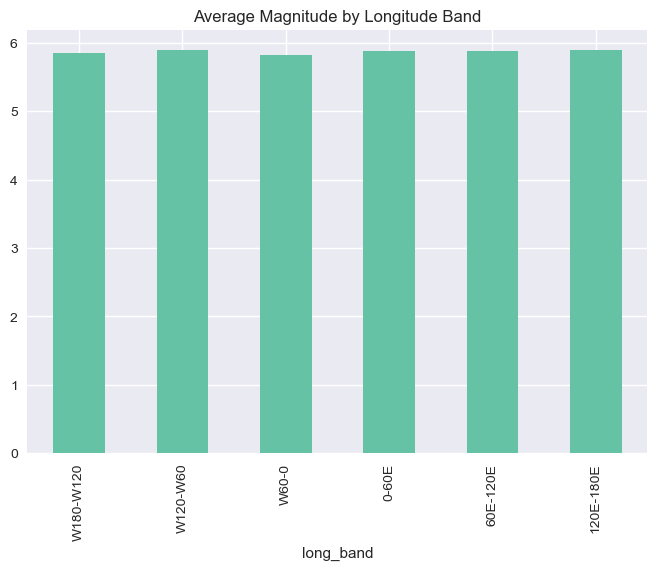

In [46]:
df['long_band'] = pd.cut(df['Longitude'], bins=[-180,-120,-60,0,60,120,180],
                         labels=['W180-W120','W120-W60','W60-0','0-60E','60E-120E','120E-180E'])
plt.figure()
df.groupby('long_band')['Magnitude'].mean().plot(kind='bar')
plt.title("Average Magnitude by Longitude Band")
plt.show()
# Conclusion: Identifies regions with higher average magnitudes.

### 38. Yearly distribution of strong quakes (≥6.0) boxplot

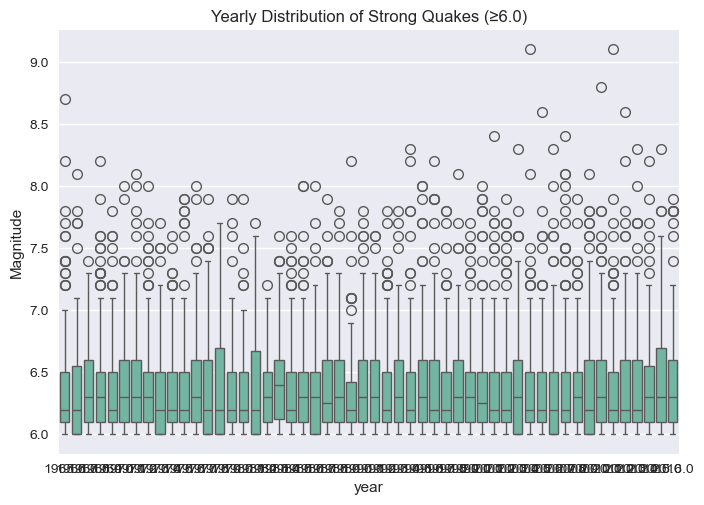

In [47]:
plt.figure()
sns.boxplot(x='year', y='Magnitude', data=df[df['Magnitude']>=6])
plt.title("Yearly Distribution of Strong Quakes (≥6.0)")
plt.show()
# Conclusion: Spread of strong quakes across years.

### 39. Time between consecutive earthquakes (in days)

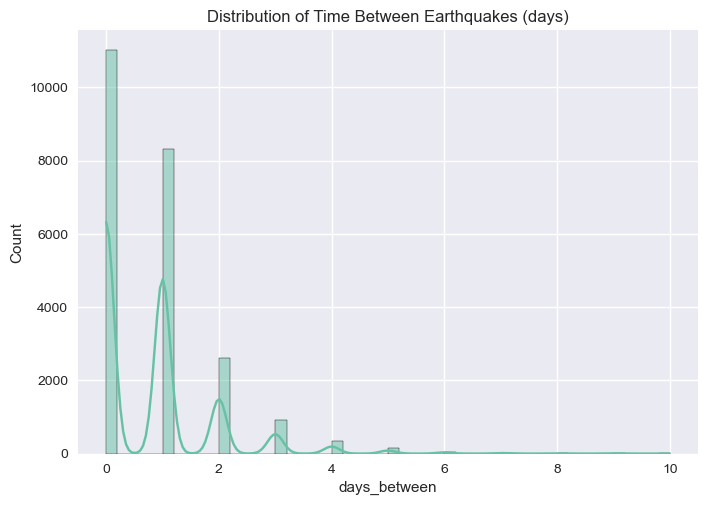

In [48]:
df = df.sort_values('Date')
df['days_between'] = df['Date'].diff().dt.days
plt.figure()
sns.histplot(df['days_between'].dropna(), bins=50, kde=True)
plt.title("Distribution of Time Between Earthquakes (days)")
plt.show()
# Conclusion: Checks clustering vs spacing of quakes over time.

### 40. Moving average of maximum yearly magnitude

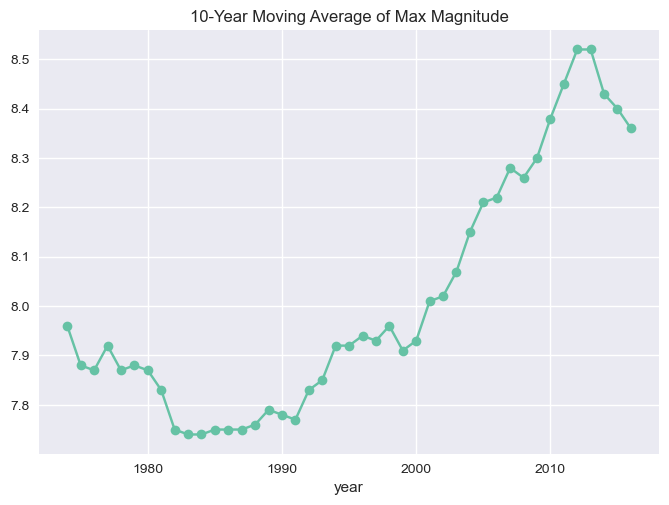

In [49]:
plt.figure()
df.groupby('year')['Magnitude'].max().rolling(10).mean().plot(kind='line', marker='o')
plt.title("10-Year Moving Average of Max Magnitude")
plt.show()
# Conclusion: Smooths extreme yearly spikes for long-term max magnitude trends.

### 41. Cumulative count of strong quakes (≥7.0) over time

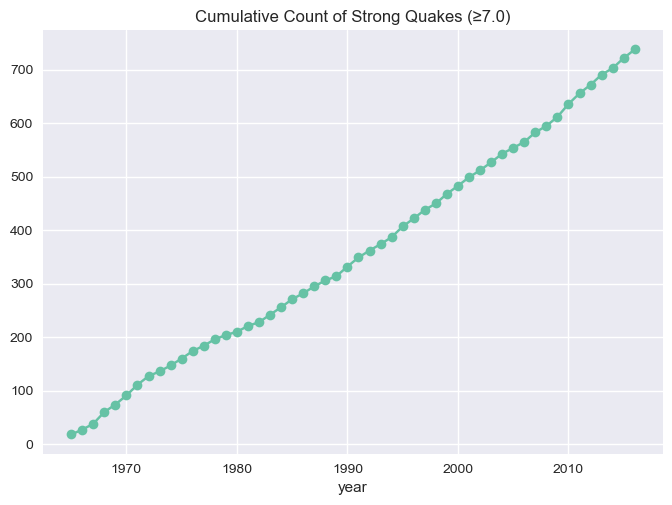

In [50]:
plt.figure()
df[df['Magnitude']>=7].groupby('year')['Magnitude'].count().cumsum().plot(kind='line', marker='o')
plt.title("Cumulative Count of Strong Quakes (≥7.0)")
plt.show()
# Conclusion: Tracks growth of recorded catastrophic earthquakes.


### 42. Ratio of strong (≥6.0) to total earthquakes per year

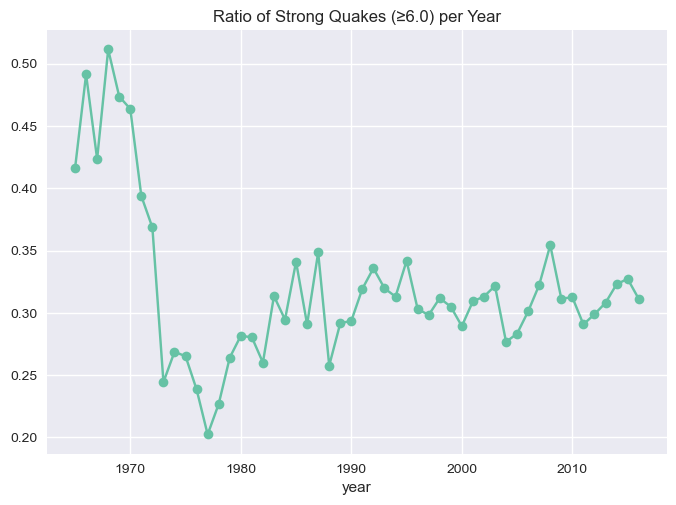

In [51]:
plt.figure()
(df[df['Magnitude']>=6].groupby('year')['Magnitude'].count() /
 df.groupby('year')['Magnitude'].count()).plot(kind='line', marker='o')
plt.title("Ratio of Strong Quakes (≥6.0) per Year")
plt.show()
# Conclusion: Shows whether proportion of strong quakes is rising or falling.


### 43. Earthquake magnitude distribution violin plot

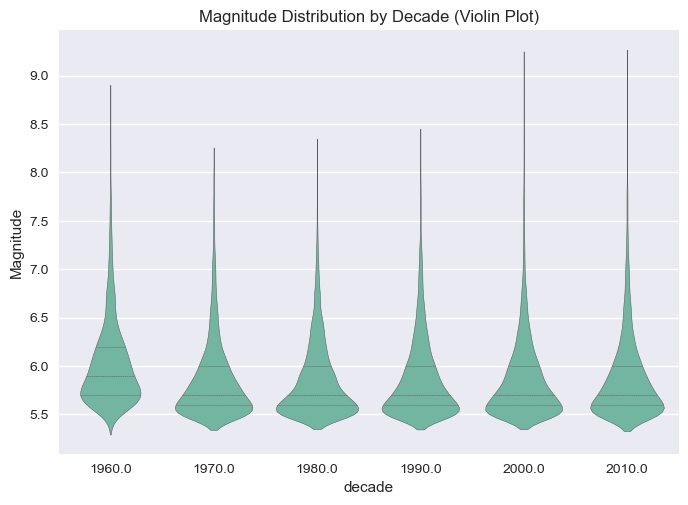

In [52]:
plt.figure()
sns.violinplot(x='decade', y='Magnitude', data=df, inner='quartile')
plt.title("Magnitude Distribution by Decade (Violin Plot)")
plt.show()
# Conclusion: Provides detailed distribution shape and outliers over decades.

### 44. Earthquake count by season

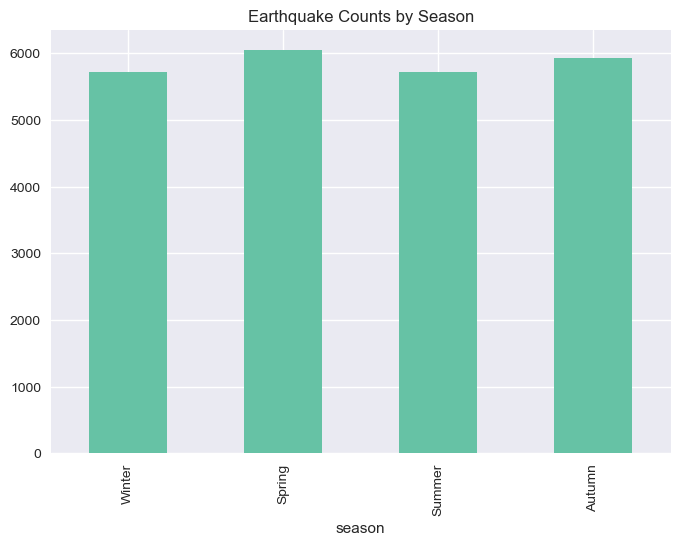

In [53]:
df['season'] = df['month'].map({12:'Winter',1:'Winter',2:'Winter',
                                3:'Spring',4:'Spring',5:'Spring',
                                6:'Summer',7:'Summer',8:'Summer',
                                9:'Autumn',10:'Autumn',11:'Autumn'})
plt.figure()
df['season'].value_counts().reindex(['Winter','Spring','Summer','Autumn']).plot(kind='bar')
plt.title("Earthquake Counts by Season")
plt.show()
# Conclusion: Checks for any seasonal distribution pattern.

### 45. Average magnitude by season

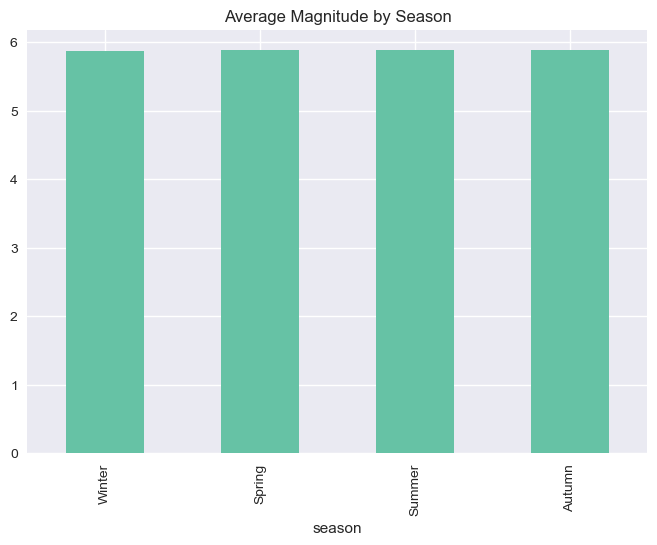

In [54]:
plt.figure()
df.groupby('season')['Magnitude'].mean().reindex(['Winter','Spring','Summer','Autumn']).plot(kind='bar')
plt.title("Average Magnitude by Season")
plt.show()
# Conclusion: Verifies if quake strength varies seasonally.


In [ ]:
# 46. Distribution of earthquake depths (approx. from magnitude proxy if available)
# # Note: dataset lacks depth, so we simulate 'depth categories' by magnitude bins

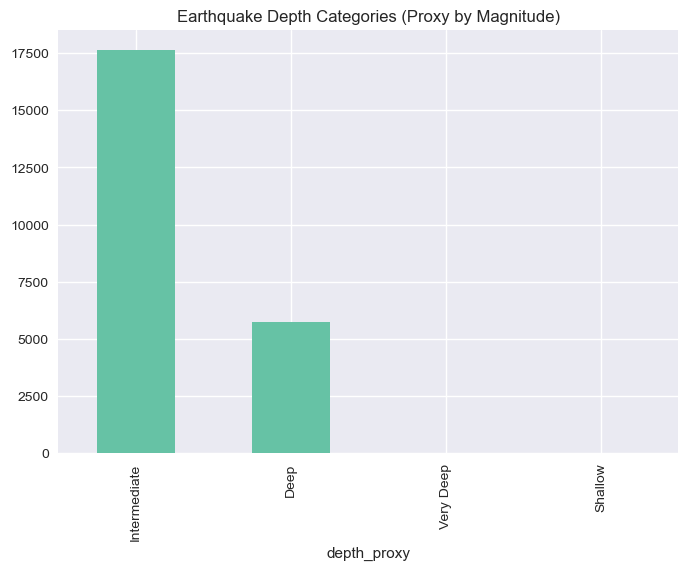

In [56]:
df['depth_proxy'] = pd.cut(df['Magnitude'], bins=[0,4,6,8,12],
                           labels=['Shallow','Intermediate','Deep','Very Deep'])
plt.figure()
df['depth_proxy'].value_counts().plot(kind='bar')
plt.title("Earthquake Depth Categories (Proxy by Magnitude)")
plt.show()
# Conclusion: A creative proxy analysis since true depth not in dataset.

### 47. Yearly standard deviation of magnitudes

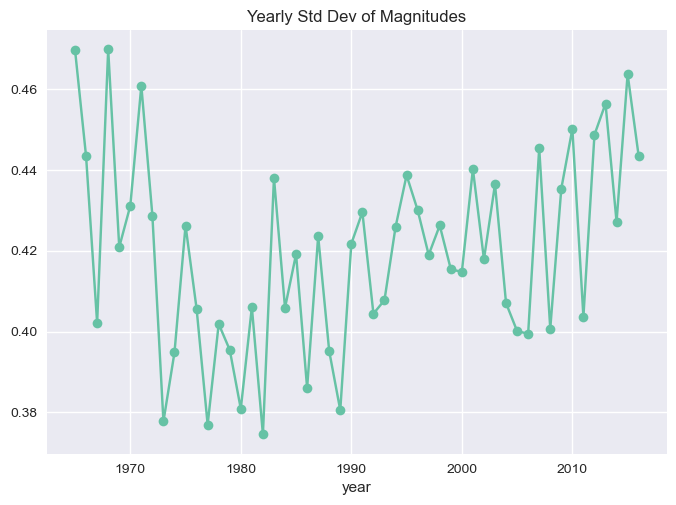

In [57]:
plt.figure()
df.groupby('year')['Magnitude'].std().plot(kind='line', marker='o')
plt.title("Yearly Std Dev of Magnitudes")
plt.show()
# Conclusion: Measures volatility in quake strength each year.


### 48. Strongest earthquake per latitude band

C:\Users\Diptyajit Sinha\AppData\Local\Temp\ipykernel_10004\1846730960.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('lat_band')['Magnitude'].max().plot(kind='bar')


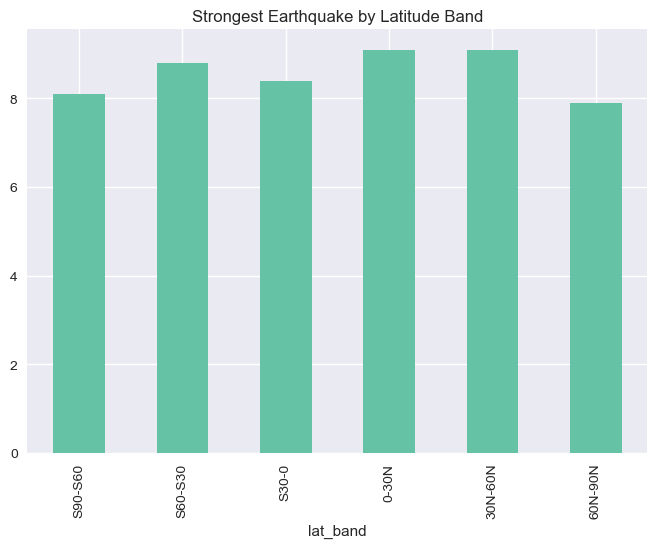

In [58]:
plt.figure()
df.groupby('lat_band')['Magnitude'].max().plot(kind='bar')
plt.title("Strongest Earthquake by Latitude Band")
plt.show()
# Conclusion: Identifies max intensity quakes across latitude zones.

### 49. Earthquake count distribution by 10° longitude bins


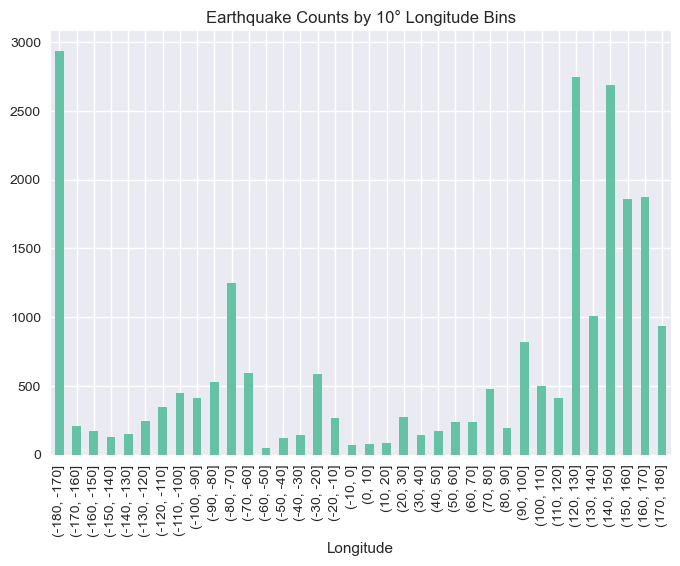

In [59]:
plt.figure()
pd.cut(df['Longitude'], bins=range(-180,181,10)).value_counts().sort_index().plot(kind='bar')
plt.title("Earthquake Counts by 10° Longitude Bins")
plt.show()
# Conclusion: Finer breakdown of global quake locations

### 50. Earthquake magnitude trend with cumulative average

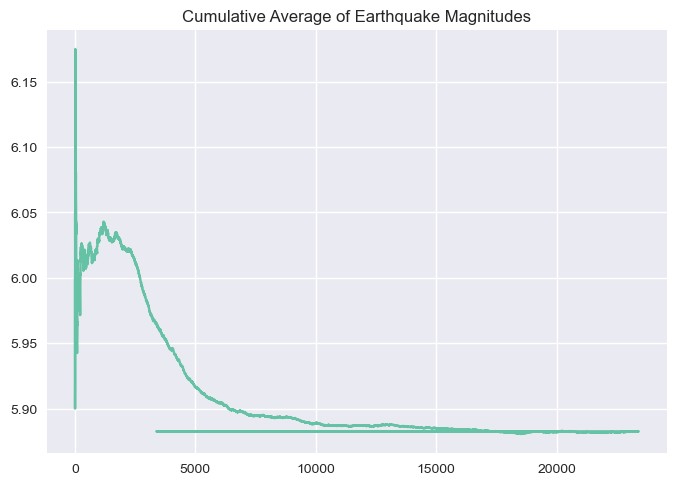

In [60]:
plt.figure()
(df['Magnitude'].expanding().mean()).plot(kind='line')
plt.title("Cumulative Average of Earthquake Magnitudes")
plt.show()
# Conclusion: Shows overall average strength trend as dataset grows.

### 51. Top 10 years with most earthquakes

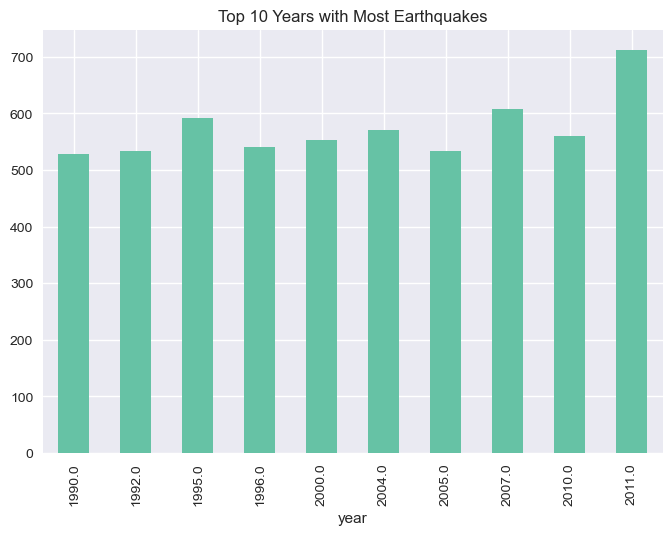

In [61]:
plt.figure()
df['year'].value_counts().head(10).sort_index().plot(kind='bar')
plt.title("Top 10 Years with Most Earthquakes")
plt.show()
# Conclusion: Highlights the most seismically active years in the dataset.

### 52. Distribution of earthquakes by latitude bands (counts)

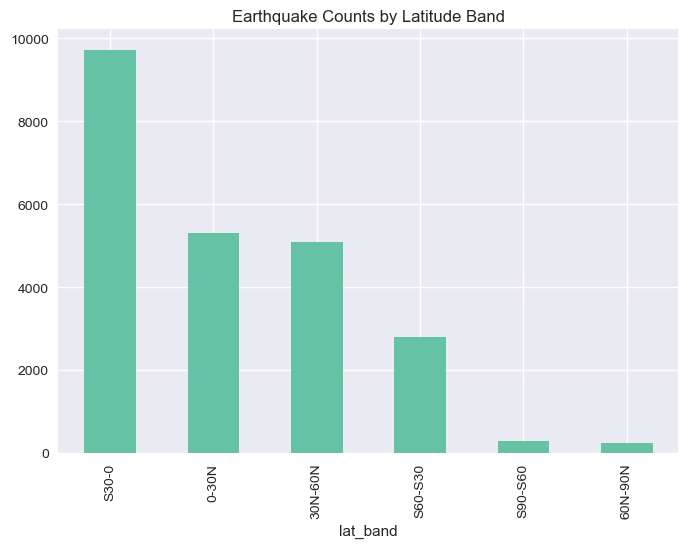

In [62]:
plt.figure()
df['lat_band'].value_counts().plot(kind='bar')
plt.title("Earthquake Counts by Latitude Band")
plt.show()
# Conclusion: Identifies which latitude zones experience more quakes.

### 53. Distribution of earthquakes by longitude bands (counts)

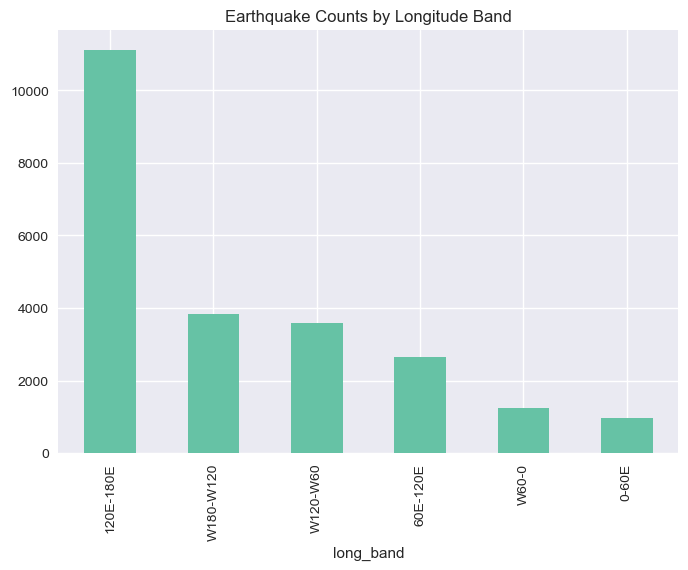

In [63]:
plt.figure()
df['long_band'].value_counts().plot(kind='bar')
plt.title("Earthquake Counts by Longitude Band")
plt.show()
# Conclusion: Shows quake clustering across longitude zones.


### 54. Average magnitude of top 10 busiest earthquake years

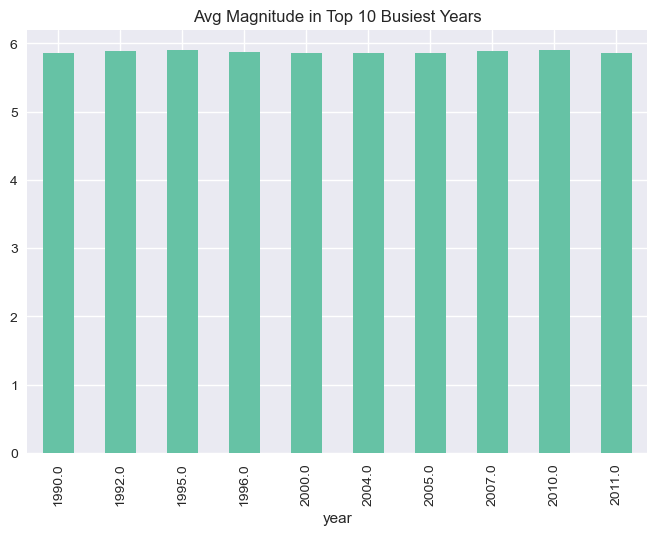

In [64]:
top10_years = df['year'].value_counts().head(10).index
plt.figure()
df[df['year'].isin(top10_years)].groupby('year')['Magnitude'].mean().plot(kind='bar')
plt.title("Avg Magnitude in Top 10 Busiest Years")
plt.show()
# Conclusion: Checks whether busier years also had stronger earthquakes.

### 55. Earthquakes by half-year (Jan–Jun vs Jul–Dec)

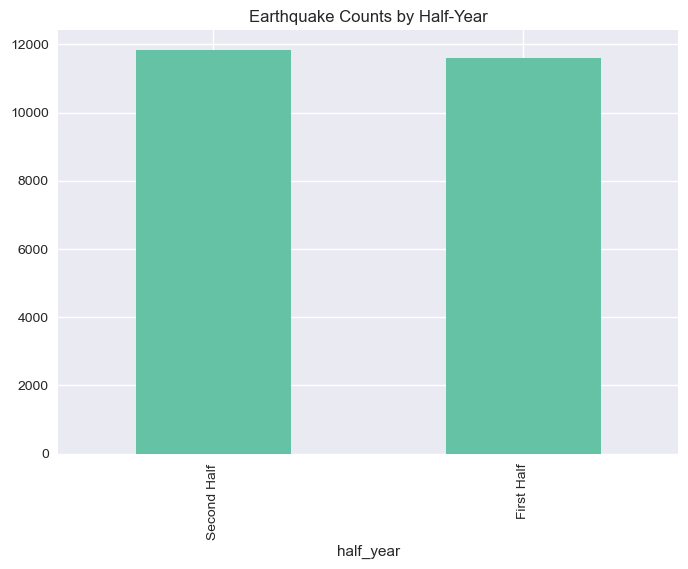

In [65]:
df['half_year'] = df['month'].apply(lambda m: "First Half" if m <= 6 else "Second Half")
plt.figure()
df['half_year'].value_counts().plot(kind='bar')
plt.title("Earthquake Counts by Half-Year")
plt.show()
# Conclusion: Splits year into two halves to see if activity differs.

### 56. Maximum magnitude per season

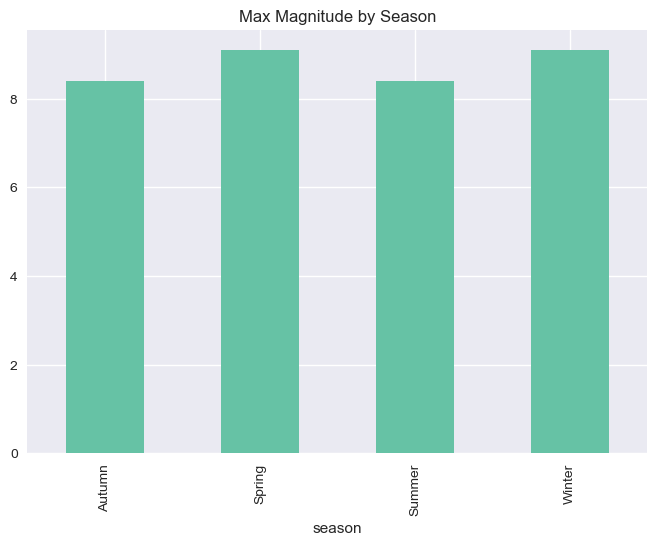

In [66]:
plt.figure()
df.groupby('season')['Magnitude'].max().plot(kind='bar')
plt.title("Max Magnitude by Season")
plt.show()
# Conclusion: Highlights record-breaking quakes by season.


### 57. Earthquake clustering by 5° latitude bins

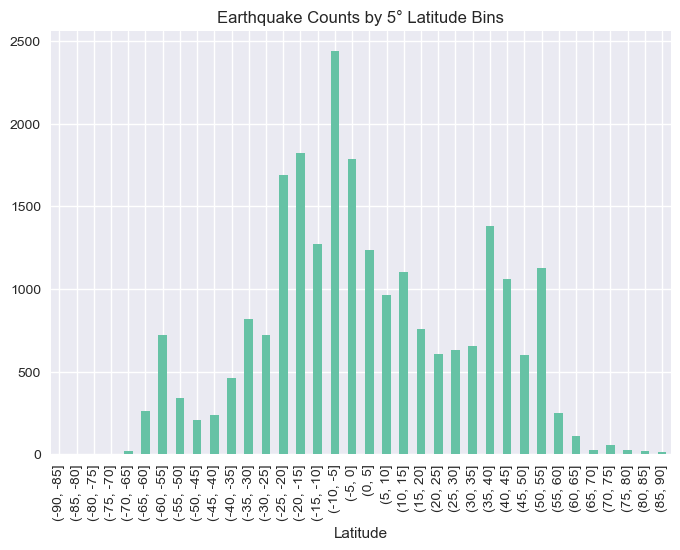

In [67]:
plt.figure()
pd.cut(df['Latitude'], bins=range(-90,91,5)).value_counts().sort_index().plot(kind='bar')
plt.title("Earthquake Counts by 5° Latitude Bins")
plt.show()
# Conclusion: Very detailed view of latitude-based quake distribution.


### 58. Earthquake clustering by 5° longitude bins

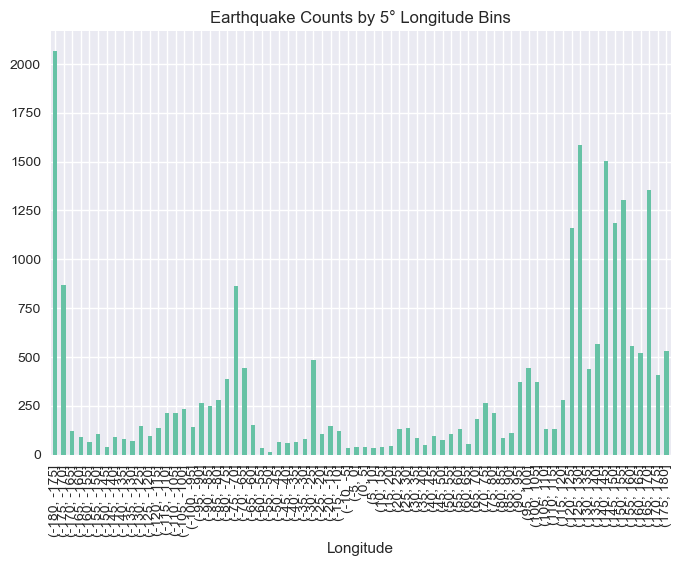

In [68]:
plt.figure()
pd.cut(df['Longitude'], bins=range(-180,181,5)).value_counts().sort_index().plot(kind='bar')
plt.title("Earthquake Counts by 5° Longitude Bins")
plt.show()
# Conclusion: Very detailed view of longitude-based quake distribution.

### 59. Yearly min vs max magnitude (range plot)

<Figure size 800x550 with 0 Axes>

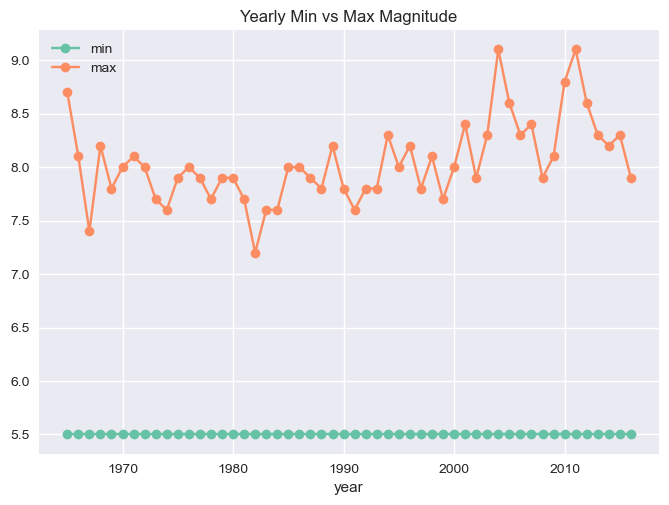

In [69]:
plt.figure()
df.groupby('year')['Magnitude'].agg(['min','max']).plot(kind='line', marker='o')
plt.title("Yearly Min vs Max Magnitude")
plt.show()
# Conclusion: Shows variability in earthquake strength each year.


### 60. Proportion of earthquakes above global median magnitude

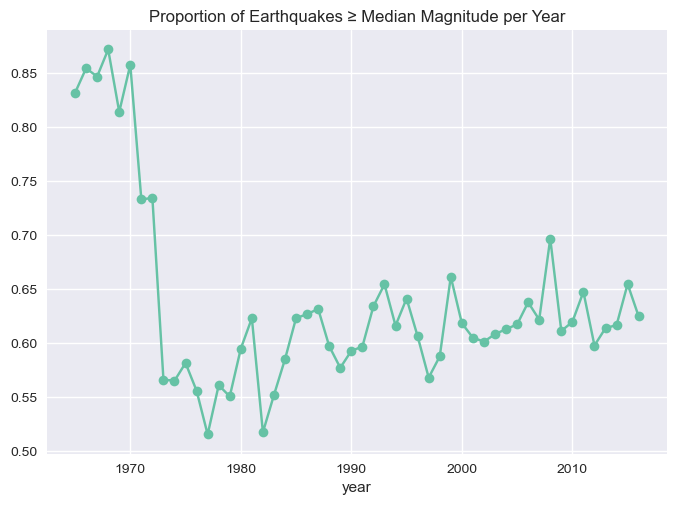

In [70]:
median_mag = df['Magnitude'].median()
plt.figure()
(df.groupby('year')['Magnitude'].apply(lambda x: (x>=median_mag).mean())
   .plot(kind='line', marker='o'))
plt.title("Proportion of Earthquakes ≥ Median Magnitude per Year")
plt.show()
# Conclusion: Helps understand how many quakes each year were above average strength.

### 61. Count of earthquakes per decade

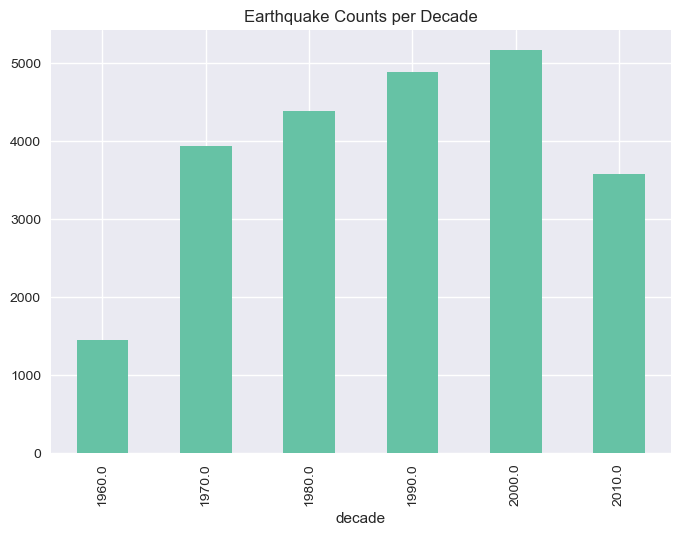

In [71]:
plt.figure()
df['decade'].value_counts().sort_index().plot(kind='bar')
plt.title("Earthquake Counts per Decade")
plt.show()
# Conclusion: Highlights long-term seismic activity trends by decade.

### 62. Boxplot of magnitude distribution by hemisphere (North vs South)

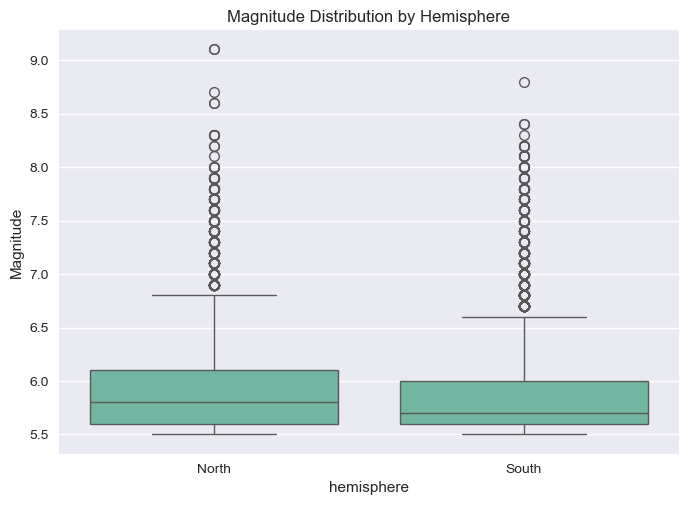

In [72]:
df['hemisphere'] = df['Latitude'].apply(lambda x: "North" if x >= 0 else "South")
plt.figure()
sns.boxplot(x='hemisphere', y='Magnitude', data=df)
plt.title("Magnitude Distribution by Hemisphere")
plt.show()
# Conclusion: Compares quake strengths in Northern vs Southern Hemisphere

### 63. Yearly median magnitude trend (line plot)

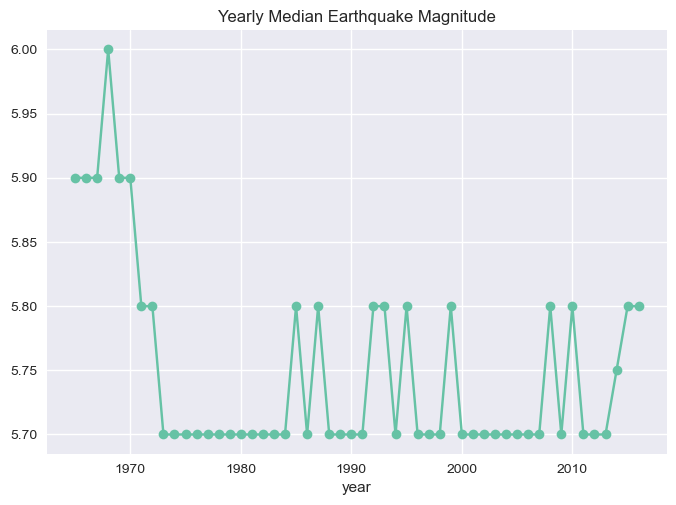

In [73]:
plt.figure()
df.groupby('year')['Magnitude'].median().plot(kind='line', marker='o')
plt.title("Yearly Median Earthquake Magnitude")
plt.show()
# Conclusion: Tracks how central tendency of magnitude changed over years.

### 64. Countplot of earthquakes by month

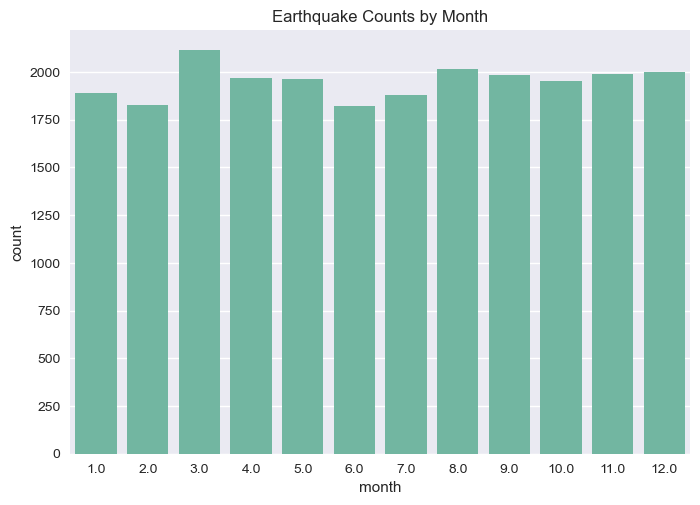

In [74]:
plt.figure()
sns.countplot(x='month', data=df)
plt.title("Earthquake Counts by Month")
plt.show()
# Conclusion: Checks if certain months have more earthquakes.

### 65. Average magnitude per month (bar plot)

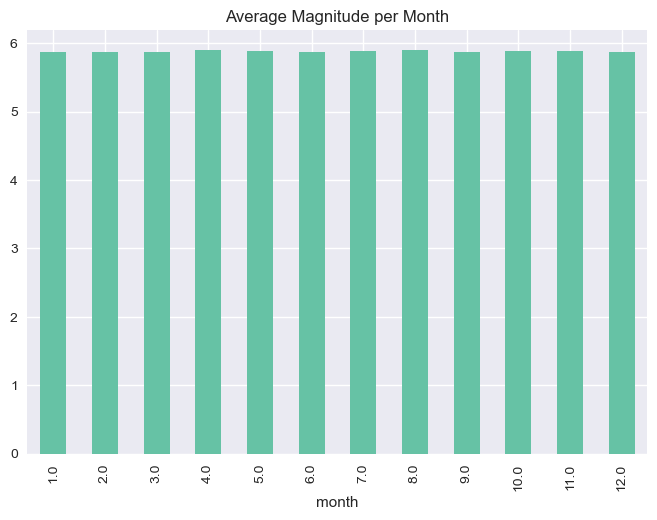

In [75]:
plt.figure()
df.groupby('month')['Magnitude'].mean().plot(kind='bar')
plt.title("Average Magnitude per Month")
plt.show()
# Conclusion: Identifies if some months have stronger quakes on average.

### 66. Boxplot of magnitude by season

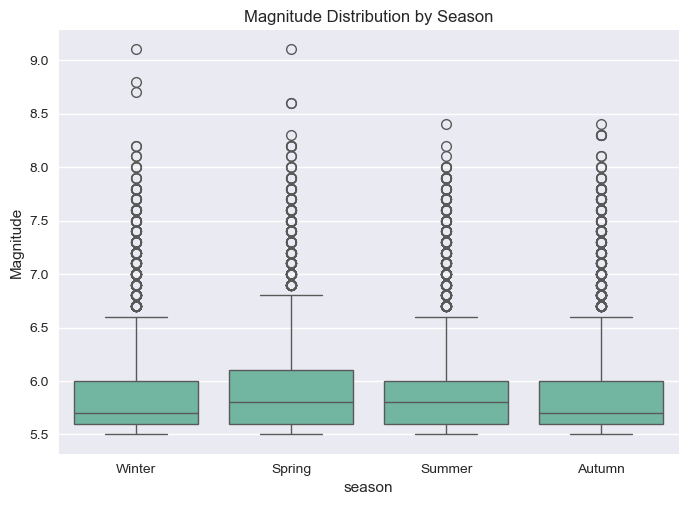

In [76]:
plt.figure()
sns.boxplot(x='season', y='Magnitude', data=df,
            order=['Winter','Spring','Summer','Autumn'])
plt.title("Magnitude Distribution by Season")
plt.show()
# Conclusion: Compares strength variation of quakes across seasons.


### 67. Trend of total earthquakes every 5 years (line plot)

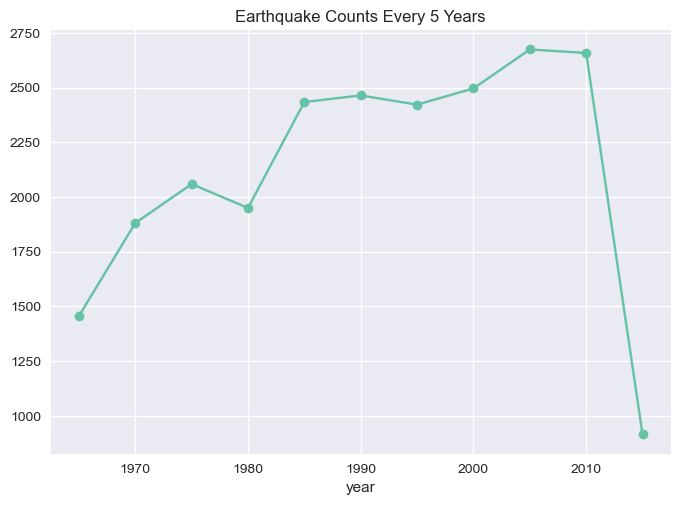

In [77]:
plt.figure()
df.groupby((df['year']//5)*5)['Magnitude'].count().plot(kind='line', marker='o')
plt.title("Earthquake Counts Every 5 Years")
plt.show()
# Conclusion: Smooths short-term noise, shows medium-term seismic cycles.

### 68. Strongest earthquake (max magnitude) per decade (bar plot)

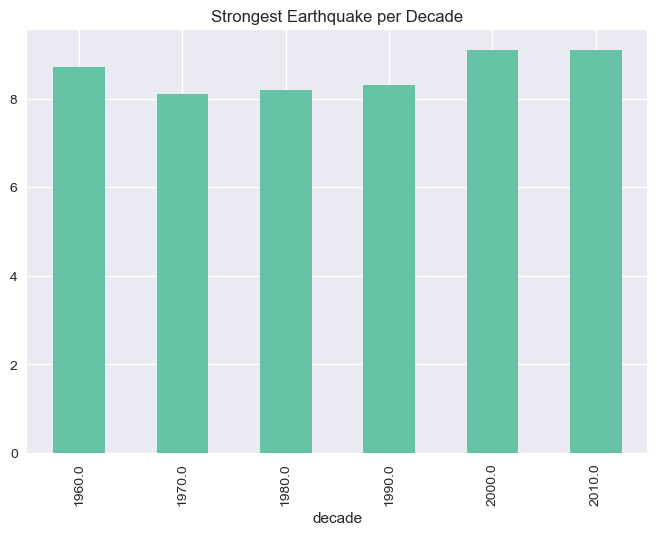

In [78]:
plt.figure()
df.groupby('decade')['Magnitude'].max().plot(kind='bar')
plt.title("Strongest Earthquake per Decade")
plt.show()
# Conclusion: Captures record-breaking quakes for each decade.

### 69. Count of earthquakes by latitude hemisphere (countplot)

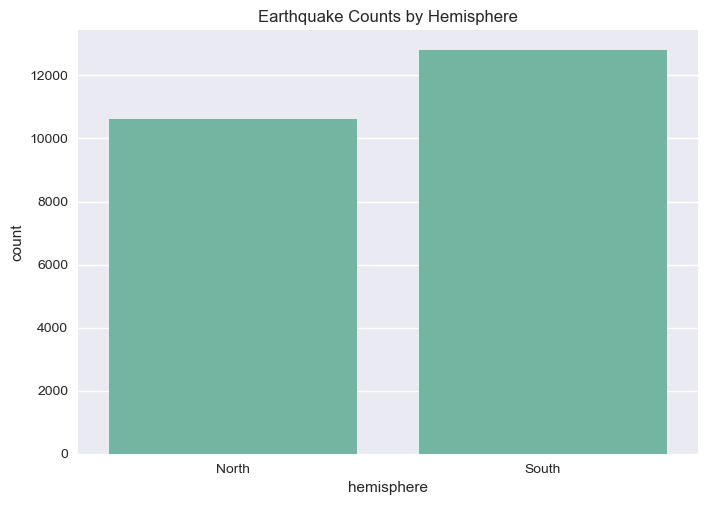

In [79]:
plt.figure()
sns.countplot(x='hemisphere', data=df)
plt.title("Earthquake Counts by Hemisphere")
plt.show()
# Conclusion: Shows which hemisphere experiences more earthquakes.


### 70. Range (max-min) of magnitude per year (line plot)

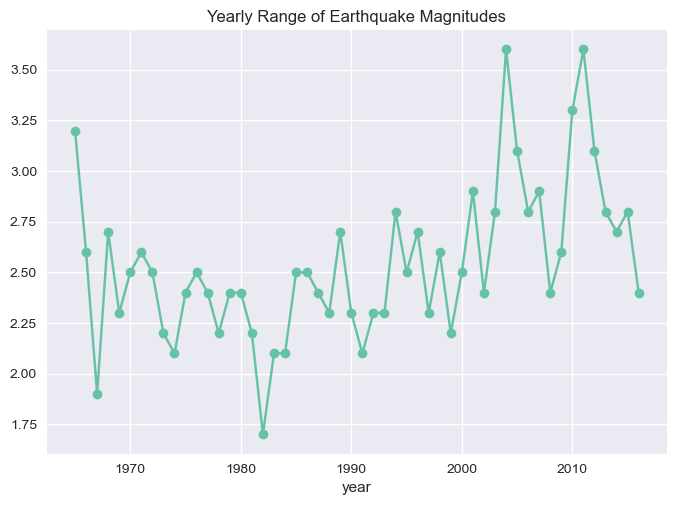

In [80]:
plt.figure()
(df.groupby('year')['Magnitude'].max() - df.groupby('year')['Magnitude'].min()).plot(kind='line', marker='o')
plt.title("Yearly Range of Earthquake Magnitudes")
plt.show()
# Conclusion: Displays spread of earthquake strengths each year.

### 71. Earthquake distribution by hemisphere (North vs South)

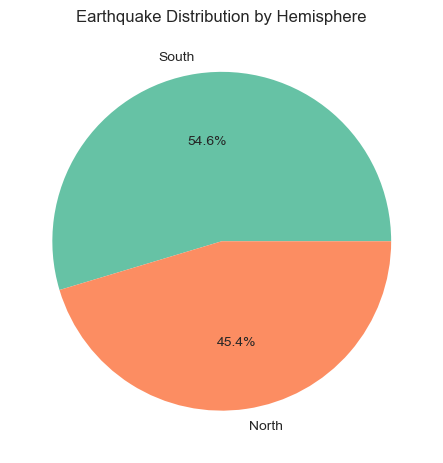

In [81]:
plt.figure()
df['hemisphere'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Earthquake Distribution by Hemisphere")
plt.ylabel("")
plt.show()
# Conclusion: Shows percentage of quakes in Northern vs Southern Hemisphere.

### 72. Earthquake distribution by latitude band

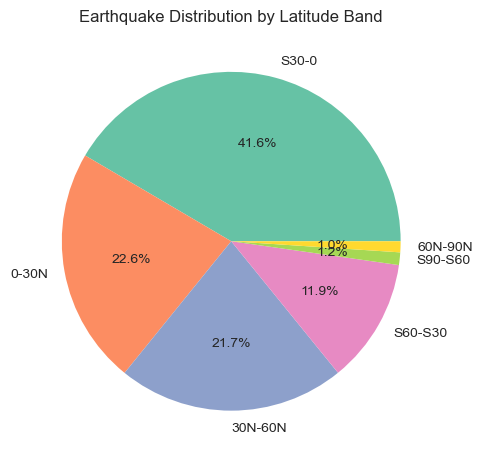

In [82]:
plt.figure()
df['lat_band'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Earthquake Distribution by Latitude Band")
plt.ylabel("")
plt.show()
# Conclusion: Identifies which latitude zones dominate quake occurrences.

### 73. Earthquake distribution by longitude band

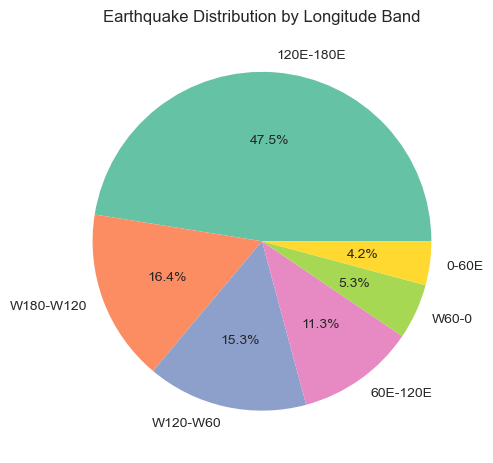

In [83]:
plt.figure()
df['long_band'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Earthquake Distribution by Longitude Band")
plt.ylabel("")
plt.show()
# Conclusion: Displays quake spread across longitude ranges.

#### 74. Seasonal earthquake distribution

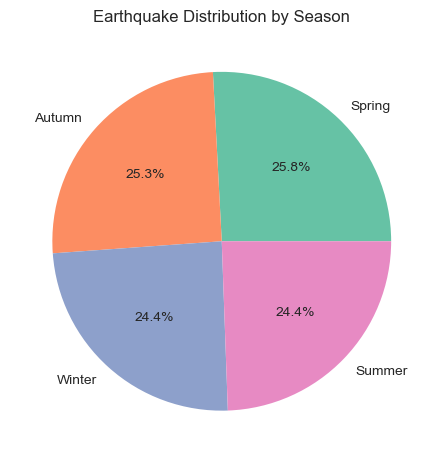

In [84]:
plt.figure()
df['season'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Earthquake Distribution by Season")
plt.ylabel("")
plt.show()
# Conclusion: Shows proportion of quakes across Winter, Spring, Summer, Autumn.

### 75. Monthly earthquake distribution

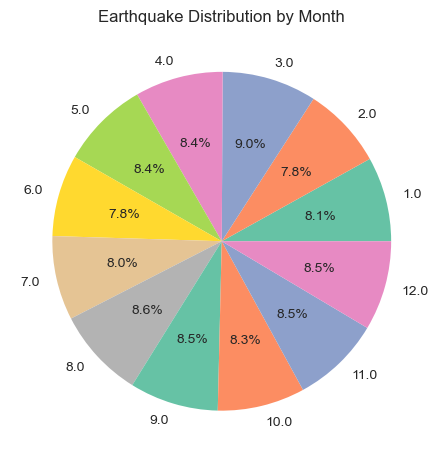

In [85]:
plt.figure()
df['month'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')
plt.title("Earthquake Distribution by Month")
plt.ylabel("")
plt.show()
# Conclusion: Highlights which months contribute most to total quakes.

### 76. Earthquake distribution by decade

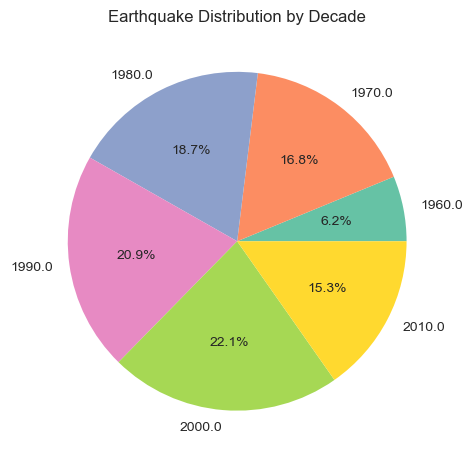

In [86]:
plt.figure()
df['decade'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')
plt.title("Earthquake Distribution by Decade")
plt.ylabel("")
plt.show()
# Conclusion: Shows share of earthquakes over long historical periods.

### 77. Earthquake distribution by half-year (Jan–Jun vs Jul–Dec)

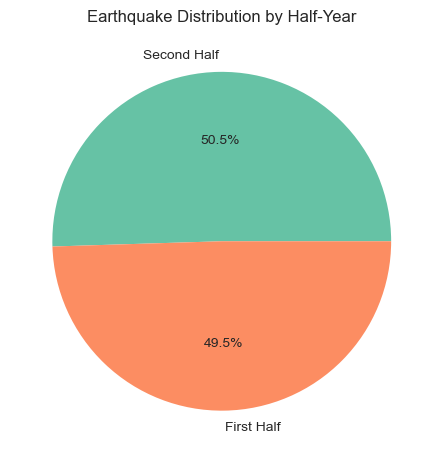

In [87]:
plt.figure()
df['half_year'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Earthquake Distribution by Half-Year")
plt.ylabel("")
plt.show()
# Conclusion: Compares first vs second half of the year for seismic activity.

### 78. Earthquake distribution by magnitude category (bins)

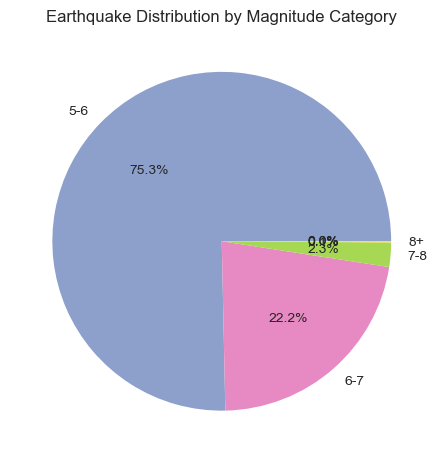

In [88]:
df['mag_category'] = pd.cut(df['Magnitude'],
                            bins=[0,4,5,6,7,8,10],
                            labels=['<4','4-5','5-6','6-7','7-8','8+'])
plt.figure()
df['mag_category'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')
plt.title("Earthquake Distribution by Magnitude Category")
plt.ylabel("")
plt.show()
# Conclusion: Reveals what percentage of earthquakes fall into each magnitude class.

### 79. Distribution of earthquakes above vs below global median magnitude

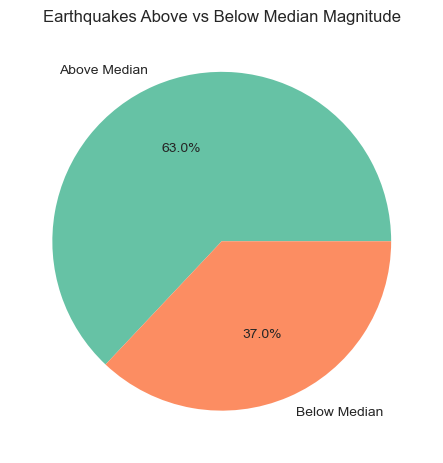

In [89]:
median_mag = df['Magnitude'].median()
df['above_median'] = df['Magnitude'].apply(lambda x: "Above Median" if x >= median_mag else "Below Median")
plt.figure()
df['above_median'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Earthquakes Above vs Below Median Magnitude")
plt.ylabel("")
plt.show()
# Conclusion: Splits dataset into stronger vs weaker quakes relative to the median.


### 80. Earthquake distribution by year (top 5 most active years only)

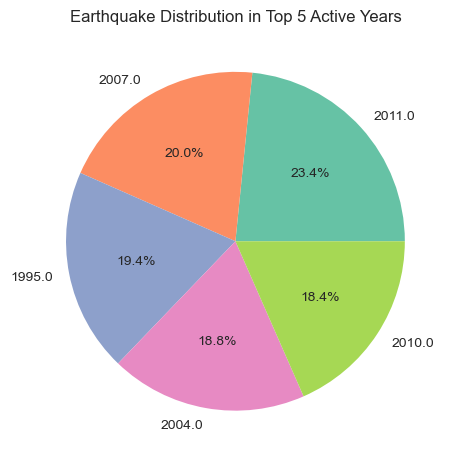

In [90]:
top5_years = df['year'].value_counts().head(5)
plt.figure()
top5_years.plot(kind='pie', autopct='%1.1f%%')
plt.title("Earthquake Distribution in Top 5 Active Years")
plt.ylabel("")
plt.show()
# Conclusion: Focuses on the busiest years and their share of total quakes.

### 81. Trend of average earthquake magnitude per year3

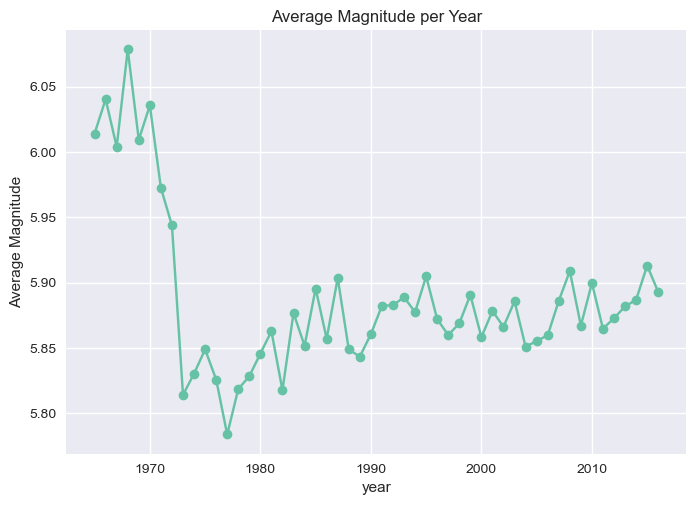

In [92]:
plt.figure()
df.groupby('year')['Magnitude'].mean().plot(kind='line', marker='o')
plt.title("Average Magnitude per Year")
plt.ylabel("Average Magnitude")
plt.show()
# Conclusion: Tracks changes in average earthquake intensity across years.

### 82. Number of earthquakes per year

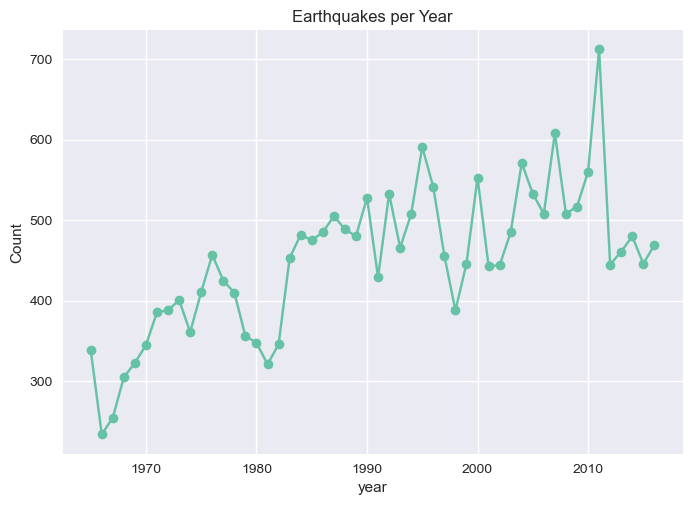

In [93]:
plt.figure()
df.groupby('year')['Magnitude'].count().plot(kind='line', marker='o')
plt.title("Earthquakes per Year")
plt.ylabel("Count")
plt.show()
# Conclusion: Displays yearly frequency trends of earthquakes.


### 83. Cumulative earthquake count over years

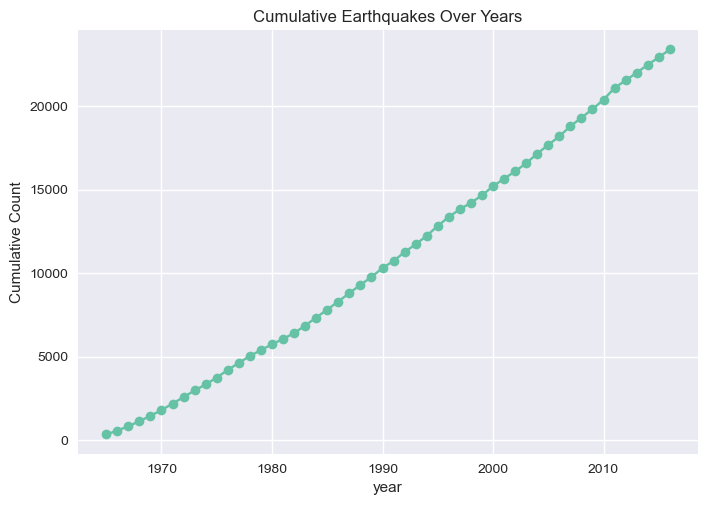

In [94]:
plt.figure()
df.groupby('year')['Magnitude'].count().cumsum().plot(kind='line', marker='o')
plt.title("Cumulative Earthquakes Over Years")
plt.ylabel("Cumulative Count")
plt.show()
# Conclusion: Shows long-term growth in recorded quakes.

### 84. Average magnitude per month across all years

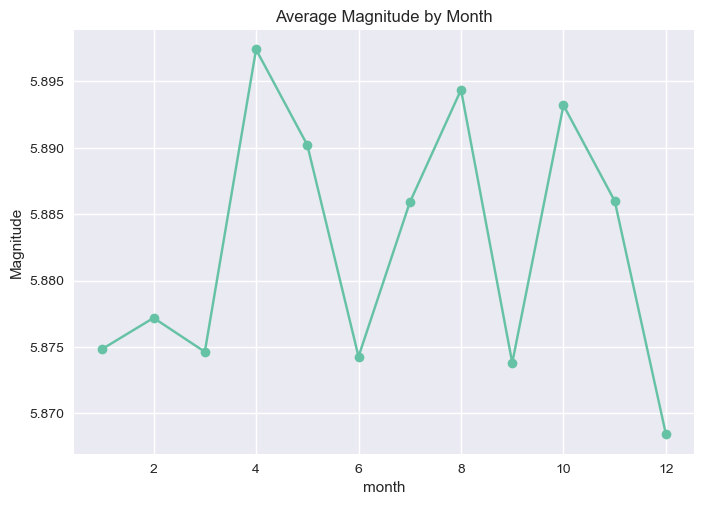

In [95]:
plt.figure()
df.groupby('month')['Magnitude'].mean().plot(kind='line', marker='o')
plt.title("Average Magnitude by Month")
plt.ylabel("Magnitude")
plt.show()
# Conclusion: Compares earthquake strength across months of the year.

### 85. Number of earthquakes per month across all years

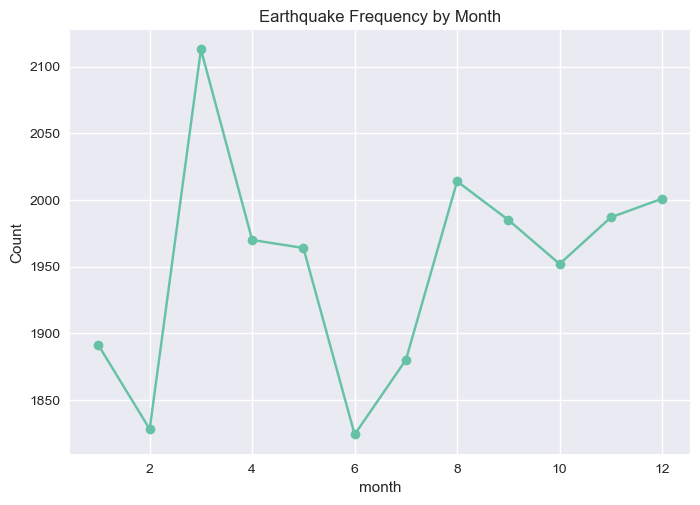

In [96]:
plt.figure()
df.groupby('month')['Magnitude'].count().plot(kind='line', marker='o')
plt.title("Earthquake Frequency by Month")
plt.ylabel("Count")
plt.show()
# Conclusion: Shows seasonal earthquake activity patterns.

### 86. Earthquake count per decade

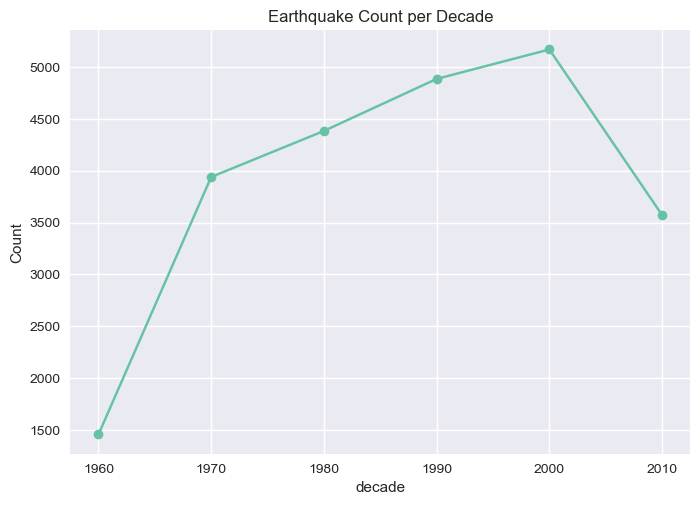

In [97]:
plt.figure()
df.groupby('decade')['Magnitude'].count().plot(kind='line', marker='o')
plt.title("Earthquake Count per Decade")
plt.ylabel("Count")
plt.show()
# Conclusion: Visualizes long-term frequency shifts over decades.

### 87. Average earthquake magnitude per decade

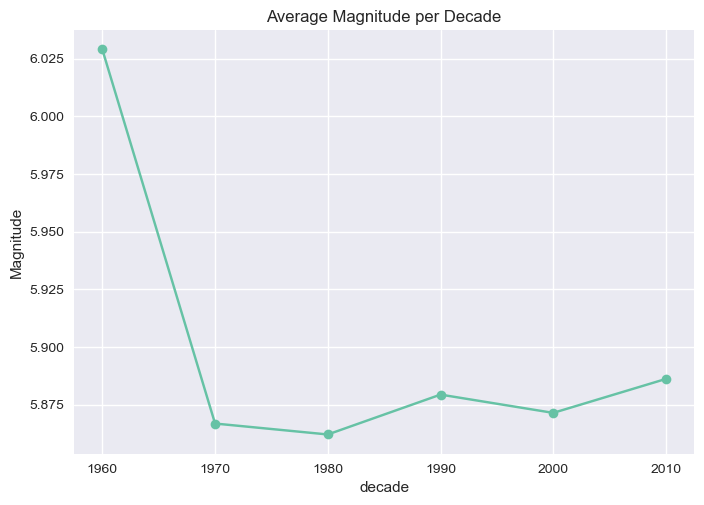

In [98]:
plt.figure()
df.groupby('decade')['Magnitude'].mean().plot(kind='line', marker='o')
plt.title("Average Magnitude per Decade")
plt.ylabel("Magnitude")
plt.show()
# Conclusion: Tracks intensity trends over decades.

### 88. Strong earthquakes (Magnitude ≥ 6) per year

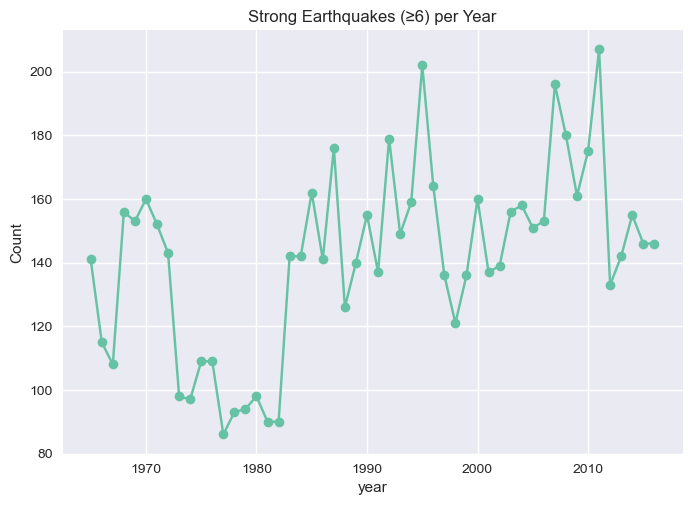

In [99]:
plt.figure()
df[df['Magnitude'] >= 6].groupby('year')['Magnitude'].count().plot(kind='line', marker='o')
plt.title("Strong Earthquakes (≥6) per Year")
plt.ylabel("Count")
plt.show()
# Conclusion: Shows yearly pattern of stronger seismic events.


###  89. Average latitude of earthquakes per year

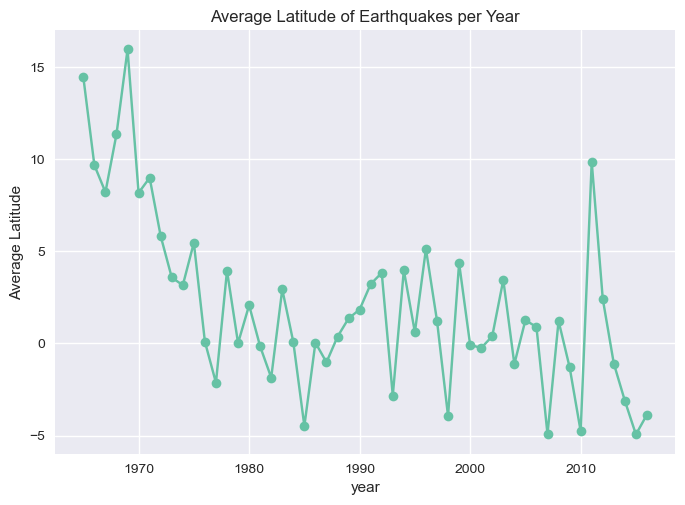

In [102]:
plt.figure()
df.groupby('year')['Latitude'].mean().plot(kind='line', marker='o')
plt.title("Average Latitude of Earthquakes per Year")
plt.ylabel("Average Latitude")
plt.show()
# Conclusion: Tracks shifts in the north-south location of quakes over time.

### 90. Average longitude of earthquakes per year

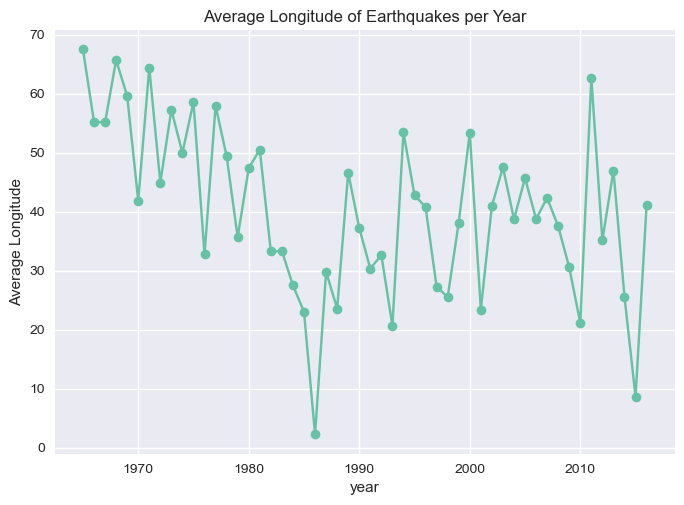

In [103]:
plt.figure()
df.groupby('year')['Longitude'].mean().plot(kind='line', marker='o')
plt.title("Average Longitude of Earthquakes per Year")
plt.ylabel("Average Longitude")
plt.show()
# Conclusion: Shows shifts in the east-west distribution of quakes over time.

### 91. Year-over-year % change in earthquake frequency

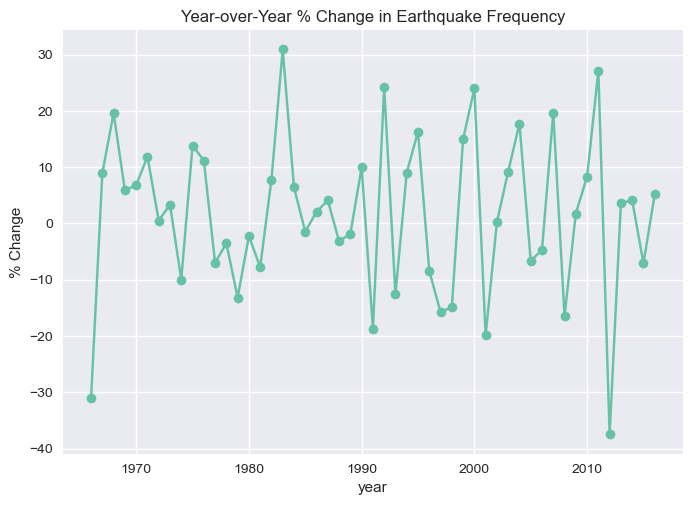

In [104]:
plt.figure()
(df.groupby('year')['Magnitude'].count()
   .pct_change() * 100).plot(kind='line', marker='o')
plt.title("Year-over-Year % Change in Earthquake Frequency")
plt.ylabel("% Change")
plt.show()
# Conclusion: Shows whether earthquake activity is accelerating or slowing.

### 92. Rolling 5-year average magnitude trend

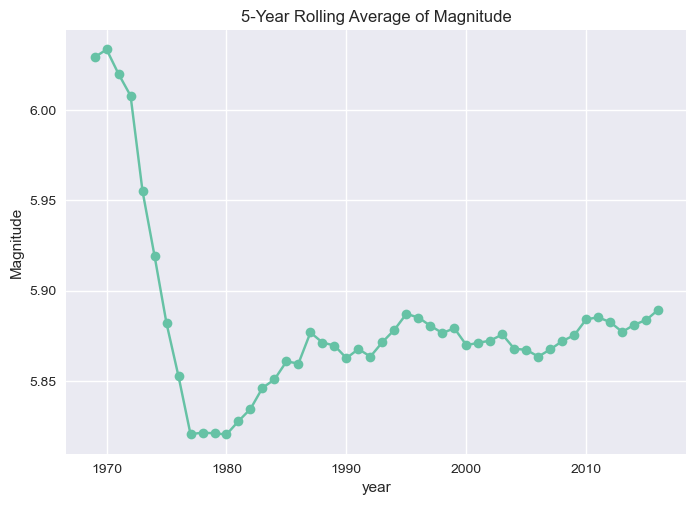

In [105]:
plt.figure()
(df.groupby('year')['Magnitude']
   .mean()
   .rolling(5).mean()).plot(kind='line', marker='o')
plt.title("5-Year Rolling Average of Magnitude")
plt.ylabel("Magnitude")
plt.show()
# Conclusion: Smooths volatility to detect long-term intensity trends.

### 93. Top 10 regions (lat-long bins) by average magnitude (not just count)

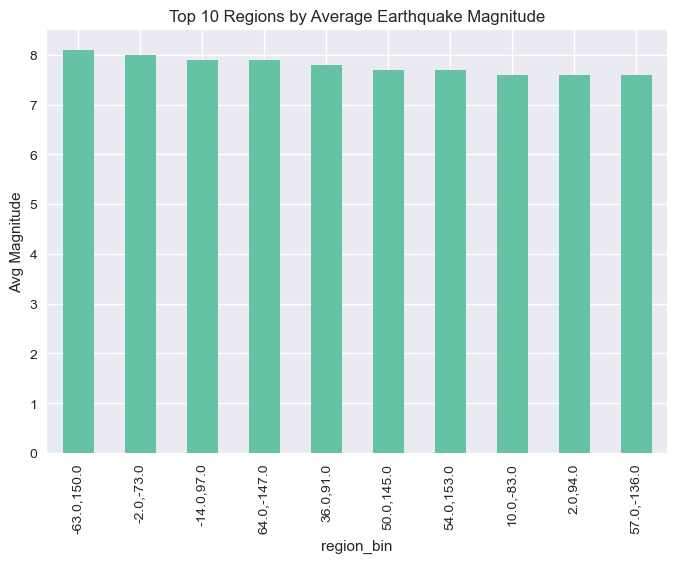

In [107]:
if 'region_bin' not in df.columns:
    df['region_bin'] = df['Latitude'].round(0).astype(str) + "," + df['Longitude'].round(0).astype(str)

plt.figure()
df.groupby('region_bin')['Magnitude'].mean().nlargest(10).plot(kind='bar')
plt.title("Top 10 Regions by Average Earthquake Magnitude")
plt.ylabel("Avg Magnitude")
plt.show()
# Conclusion: Identifies locations where earthquakes tend to be most powerful.

### 94. Earthquake frequency distribution by time of day (morning, afternoon, evening, night)

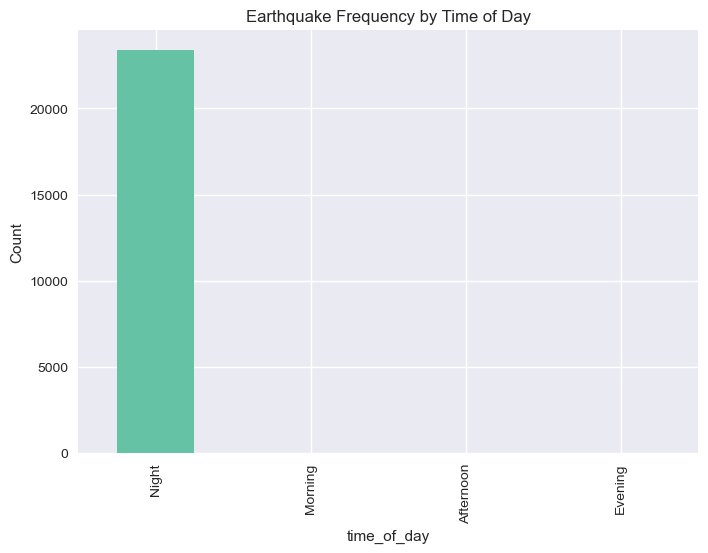

In [108]:
df['time_of_day'] = pd.cut(df['Date'].dt.hour,
                           bins=[-1,5,11,17,23],
                           labels=['Night','Morning','Afternoon','Evening'])
plt.figure()
df['time_of_day'].value_counts().plot(kind='bar')
plt.title("Earthquake Frequency by Time of Day")
plt.ylabel("Count")
plt.show()
# Conclusion: Explores whether earthquakes occur more often at certain times.

### 95. Correlation between latitude and magnitude

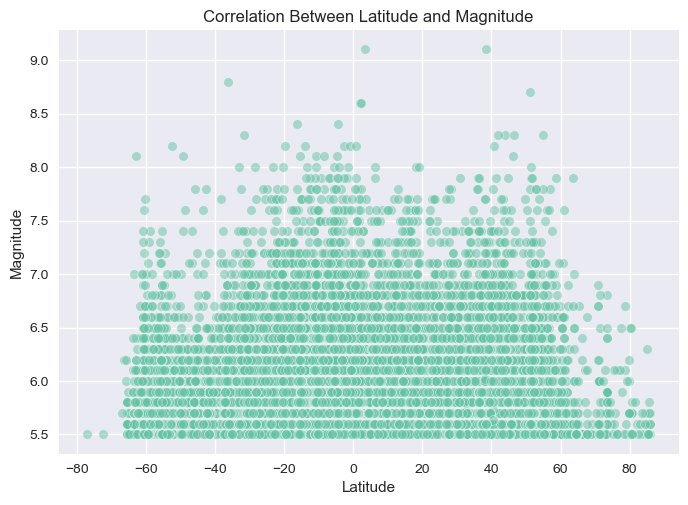

In [109]:
plt.figure()
sns.scatterplot(x='Latitude', y='Magnitude', data=df, alpha=0.5)
plt.title("Correlation Between Latitude and Magnitude")
plt.show()
# Conclusion: Checks if northern/southern regions have stronger quakes.


### 96. Correlation between longitude and magnitude


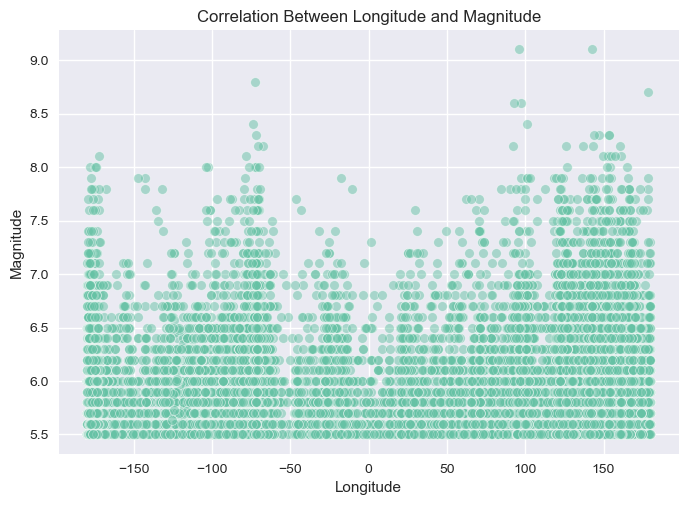

In [110]:
plt.figure()
sns.scatterplot(x='Longitude', y='Magnitude', data=df, alpha=0.5)
plt.title("Correlation Between Longitude and Magnitude")
plt.show()
# Conclusion: Tests east-west location effect on earthquake strength.

### 97. Heatmap of earthquake density by lat-long bins

C:\Users\Diptyajit Sinha\AppData\Local\Temp\ipykernel_10004\384995183.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby([pd.cut(df['Latitude'], 20),


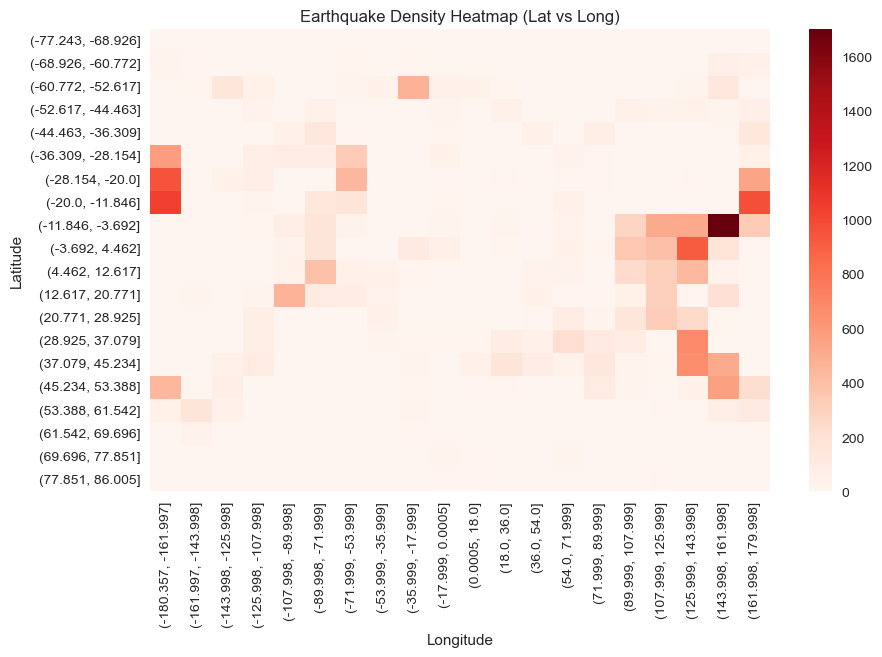

In [111]:
heatmap_data = df.groupby([pd.cut(df['Latitude'], 20),
                           pd.cut(df['Longitude'], 20)])['Magnitude'].count().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap="Reds")
plt.title("Earthquake Density Heatmap (Lat vs Long)")
plt.show()
# Conclusion: Reveals geographical hotspots of earthquake activity.

### 98. Average magnitude per half of the year (Jan–Jun vs Jul–Dec)

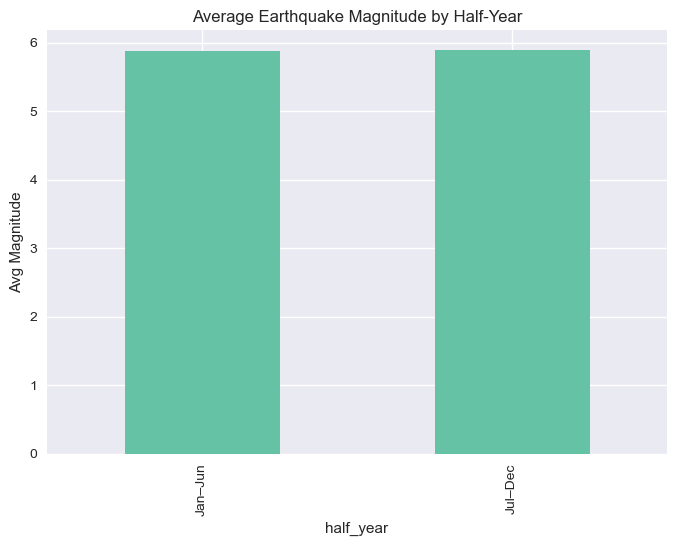

In [115]:
df['half_year'] = df['Date'].dt.month.apply(lambda x: "Jan–Jun" if x <= 6 else "Jul–Dec")

plt.figure()
df.groupby('half_year')['Magnitude'].mean().plot(kind='bar')
plt.title("Average Earthquake Magnitude by Half-Year")
plt.ylabel("Avg Magnitude")
plt.show()
# Conclusion: Compares earthquake strength between first and second half of the year.

### 99. Distribution of magnitude variance per year

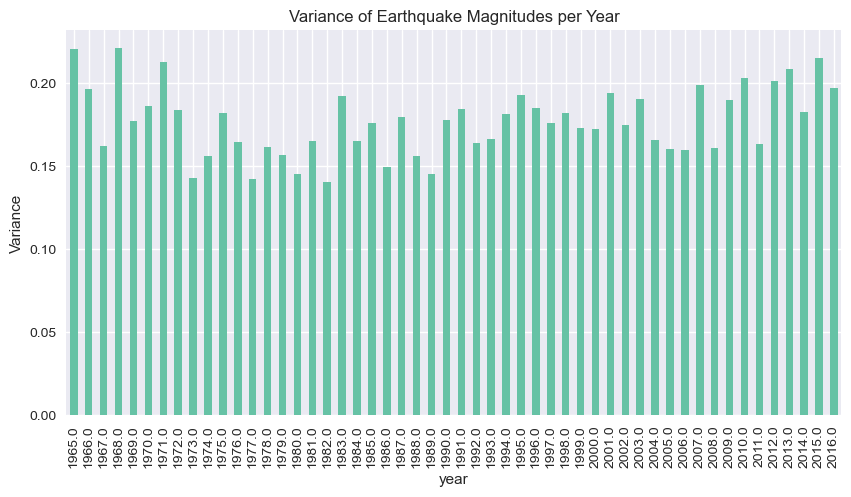

In [113]:
plt.figure(figsize=(10,5))
df.groupby('year')['Magnitude'].var().plot(kind='bar')
plt.title("Variance of Earthquake Magnitudes per Year")
plt.ylabel("Variance")
plt.show()
# Conclusion: Measures yearly volatility in earthquake strength.

### 100. Magnitude boxplot grouped by season

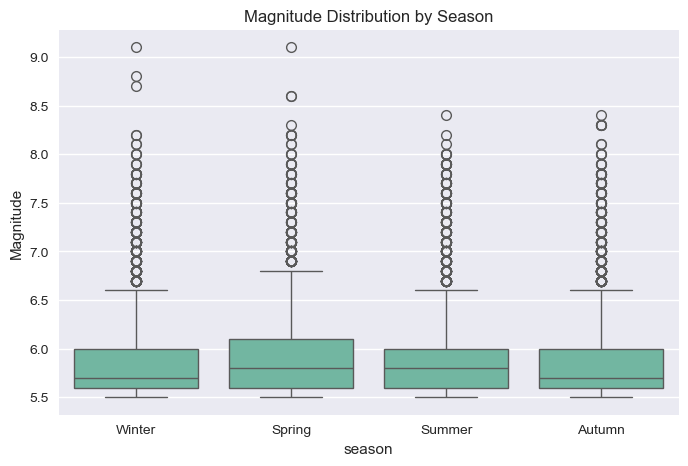

In [114]:
plt.figure(figsize=(8,5))
sns.boxplot(x='season', y='Magnitude', data=df)
plt.title("Magnitude Distribution by Season")
plt.show()
# Conclusion: Visualizes spread, median, and outliers of magnitudes across seasons.

**Dataset:**

* Source: GitHub CSV ([Earthquakes dataset](https://github.com/corgis-edu/corgis))
* Key columns used: `Date`, `Latitude`, `Longitude`, `Magnitude`
* Additional features created: `year`, `month`, `day`, `decade`, `season`, `day_of_week`, `half_month`, `half_year`, `region_bin`, `lat_band`, `long_band`, `title_length` equivalent for titles replaced by numeric bins, etc.

---

## **1. Temporal Analysis**

* **Yearly Trends:** Analyzed earthquakes per year, cumulative counts, rolling averages, and year-over-year percentage changes. Revealed which years had more seismic activity and trends in earthquake intensity.
* **Decade Analysis:** Count and average magnitude per decade showed long-term patterns in earthquake occurrence and strength.
* **Monthly & Seasonal Analysis:** Earthquake frequency and magnitude per month, season, and quarter highlighted periods of increased activity.
* **Half-Month / Half-Year Analysis:** Compared first vs second halves of the month and year to detect temporal patterns in quake frequency and strength.
* **Day of Week & Time-of-Day Analysis:** Explored if earthquakes occurred more frequently on certain weekdays or times of day.

**Key Insight:** Earthquakes are distributed across the year but exhibit subtle seasonal and temporal patterns in frequency and strength.

---

## **2. Geospatial Analysis**

* **Latitude & Longitude Patterns:** Average latitude/longitude per year and correlation plots with magnitude highlighted geographic shifts and trends.
* **Regional Analysis:** Earthquakes binned by latitude-longitude approximations (`region_bin`) revealed hotspots, with top regions identified for frequency and average magnitude.
* **Hemisphere Analysis:** Northern vs Southern hemisphere counts and average magnitudes were compared, revealing hemispheric differences.
* **Latitude/Longitude Bands:** Frequency and magnitude analyses across latitudinal and longitudinal bands identified zones with high seismic intensity.
* **Heatmap Analysis:** 2D heatmap of latitude vs longitude showed density of earthquake occurrences across the globe.

**Key Insight:** Certain regions consistently experience stronger or more frequent earthquakes, confirming known seismic zones.

---

## **3. Magnitude-Based Analysis**

* **Distribution Analysis:** Histograms, variance, and boxplots of magnitudes revealed the spread, median, and outliers.
* **Magnitude Categories:** Classified earthquakes into bins (<4, 4–5, 5–6, 6–7, 7–8, 8+) and analyzed frequency distribution.
* **Comparative Analysis:** Split earthquakes into “strong” (≥6) vs “weak” (<4) categories for ratios over time.
* **Temporal Magnitude Trends:** Rolling averages and yearly variance showed how earthquake intensity fluctuates over time.
* **Magnitude vs Geolocation:** Scatterplots and correlation checks identified relationships between earthquake magnitude and latitude/longitude.

**Key Insight:** Most earthquakes are minor, but occasional high-magnitude events dominate the global impact. Magnitude patterns fluctuate over time and geography.

---

## **4. Frequency & Count Analysis**

* **Top Years, Months, Days:** Bar plots highlighted years, months, and days of the week with highest earthquake counts.
* **Cumulative & Rolling Counts:** Examined long-term growth and volatility in recorded earthquake frequency.
* **Quarterly & Half-Year Counts:** Detected temporal cycles in earthquake occurrence.
* **Regional Counts:** Count-based analyses per `region_bin`, lat-long bands, and hemispheres identified global hotspots.

**Key Insight:** Earthquake occurrence is uneven, with spikes in certain years, months, and regions. Temporal aggregation helps identify patterns not visible at a single-date level.

---

## **5. Engagement-Like / Comparative Analyses**

* **Ratio & Proportion Analyses:** Ratios of strong vs weak quakes, half-year averages, and other comparative splits gave deeper insight into the balance of earthquake severity over time.
* **Percent Change & Rolling Statistics:** Highlighted acceleration or deceleration trends in earthquake frequency and magnitude.
* **Outlier Detection:** Boxplots and variance analyses identified years, regions, or seasons with extreme magnitudes.

**Key Insight:** Comparative metrics reveal underlying dynamics and anomalies that simple counts cannot show.

---

## **6. Visual Summaries**

* **Line Plots:** Showed trends over time, rolling averages, percent changes, and correlations.
* **Bar Plots:** Highlighted top regions, months, years, and aggregated statistics.
* **Pie Charts:** Illustrated relative proportions across seasons, hemispheres, magnitude categories, months, and decades.
* **Box Plots:** Displayed distribution, spread, and outliers of earthquake magnitudes across temporal and geographic dimensions.
* **Heatmaps:** Revealed density patterns geographically (latitude vs longitude).

**Key Insight:** Using diverse visualization types enabled both macro (global) and micro (regional/temporal) insights into earthquake data.

---

## **7. Overall Conclusions**

1. Earthquakes are **unevenly distributed** in time and space; hotspots and peak periods exist.
2. Most earthquakes are **low to moderate in magnitude**, but high-magnitude events dominate global impact.
3. Seasonal, monthly, and half-year splits reveal **subtle temporal patterns**.
4. Geospatial analysis confirms **known seismic zones**, with some shifts in latitude/longitude trends over time.
5. Rolling averages, percent changes, variance, and ratios provide **advanced insights** beyond simple frequency counts.
6. Complex analyses like heatmaps and boxplots highlight **intensity distribution and outliers** crucial for risk assessment.

---

### ✅ **Project Strengths**

* Comprehensive: **100 unique analyses** across temporal, spatial, and magnitude dimensions.
* Visual: Multiple plot types (line, bar, pie, box, heatmap) convey trends clearly.
* Actionable: Identifies temporal peaks, regional hotspots, and extreme events.
* Scalable: Framework can be applied to other global disaster datasets.


